# Step 1: Exploratory Data Analysis

---

** Table of content


In [2]:
# Imports and environment setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## 1. Initial Insight<a id="initial-insight"></a>

Load datasets:

In [3]:
df_train = pd.read_csv("../data/data_train.csv")  # Train dataset

df_test = pd.read_csv("../data/data_test.csv")    # Test dataset


### 1.1. Raw Train Dataset Overview
Shape, columns overview, and some essential statistics, and a peak into a few entries:

In [3]:
print(f"{'Shape:'}{df_train.shape}")
print(f"\n{'Duplicated entries:'} {df_train.duplicated().sum()}")
print(f"\n{'Duplicated patients:'} {df_train.duplicated(subset='Id').sum()}")
print(f"\n{'NULL VALUES COUNT'}\n{df_train.isna().sum()}")
print(f"\n{'COLUMNS OVERVIEW'}")
print(df_train.info())

Shape:(202944, 25)

Duplicated entries: 0

Duplicated patients: 0

NULL VALUES COUNT
Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

COLUMNS OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                

In [4]:
df_train.describe()

Id         HighBP       HighChol      CholCheck  \
count  202944.000000  202944.000000  202944.000000  202944.000000   
mean   101471.500000       0.428700       0.424344       0.962655   
std     58585.030853       0.494891       0.494244       0.189607   
min         0.000000       0.000000       0.000000       0.000000   
25%     50735.750000       0.000000       0.000000       1.000000   
50%    101471.500000       0.000000       0.000000       1.000000   
75%    152207.250000       1.000000       1.000000       1.000000   
max    202943.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  202944.000000  202944.000000  202944.000000         202944.000000   
mean       28.379824       0.442634       0.040844              0.094391   
std         6.612738       0.496700       0.197929              0.292372   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...       MentHlth       PhysHlth  \
count  202944.000000  202944.000000  ...  202944.000000  202944.000000   
mean        0.756302       0.635372  ...       3.196971       4.256455   
std         0.429313       0.481327  ...       7.427247       8.736665   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       0.000000       0.000000   
50%         1.000000       1.000000  ...       0.000000       0.000000   
75%         1.000000       1.000000  ...       2.000000       3.000000   
max         1.000000       1.000000  ...      30.000000      30.000000   

            DiffWalk            Sex            Age      Education  \
count  202944.000000  202944.000000  202944.000000  202944.000000   
mean        0.168707       0.439545       8.037449       5.050245   
std         0.374494       0.496333       3.051568       0.985601   
min         0.000000       0.000000       1.000000       1.000000   
25%         0.000000       0.000000       6.000000       4.000000   
50%         0.000000       0.000000       8.000000       5.000000   
75%         0.000000       1.000000      10.000000       6.000000   
max         1.000000       1.000000      13.000000       6.000000   

              Income   ExtraMedTest  ExtraAlcoholTest         Status  
count  202944.000000  202944.000000     202944.000000  202944.000000  
mean        6.055641      -7.408660         -7.560041       0.175571  
std         2.070140      75.993743         75.927137       0.380455  
min         1.000000    -199.000000       -199.000000       0.000000  
25%         5.000000     -55.000000        -55.000000       0.000000  
50%         7.000000       0.000000          0.000000       0.000000  
75%         8.000000      40.000000         40.000000       0.000000  
max         8.000000     199.000000        199.000000       1.000000  

[8 rows x 25 columns]

In [5]:
df_train.head()

Id  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0   0       0         0          1   24       1       0                     0   
1   1       0         0          1   28       0       0                     0   
2   2       0         0          1   36       1       0                     0   
3   3       0         1          1   35       0       0                     0   
4   4       0         1          1   27       0       0                     0   

   PhysActivity  Fruits  ...  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0             1       0  ...         0         0         0    0    8   
1             1       1  ...         1         0         0    0    2   
2             1       1  ...        30        30         1    0    3   
3             1       1  ...         0         0         0    0    8   
4             1       0  ...         0         0         0    0    9   

   Education  Income  ExtraMedTest  ExtraAlcoholTest  Status  
0          4       5            60                 0       0  
1          6       8             0               -64       0  
2          2       1           -46                 0       0  
3          6       8           -83              -188       0  
4          5       4           -58                 0       0  

[5 rows x 25 columns]

### 1.2. Raw Test Dataset Overview
Shape, columns overview, and some essential statistics, and a peak into a few entries:

In [6]:
print(f"{'Shape:'}{df_test.shape}")
print(f"\n{'Duplicated entries:'} {df_test.duplicated().sum()}")
print(f"\n{'Duplicated patients:'} {df_test.duplicated(subset='Id').sum()}")
print(f"\n{'NULL VALUES COUNT'}\n{df_test.isna().sum()}")
print(f"\n{'COLUMNS OVERVIEW'}")
print(df_test.info())

Shape:(50736, 25)

Duplicated entries: 0

Duplicated patients: 0

NULL VALUES COUNT
Id                          0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
ExtraMedTest                0
ExtraAlcoholTest            0
Status                  50736
dtype: int64

COLUMNS OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 25 columns):
 #   Column               

In [7]:
df_test.describe()

Id        HighBP      HighChol     CholCheck           BMI  \
count   50736.000000  50736.000000  50736.000000  50736.000000  50736.000000   
mean   228311.500000      0.430207      0.423230      0.962729     28.392522   
std     14646.365966      0.495110      0.494076      0.189428      6.592550   
min    202944.000000      0.000000      0.000000      0.000000     12.000000   
25%    215627.750000      0.000000      0.000000      1.000000     24.000000   
50%    228311.500000      0.000000      0.000000      1.000000     27.000000   
75%    240995.250000      1.000000      1.000000      1.000000     31.000000   
max    253679.000000      1.000000      1.000000      1.000000     95.000000   

             Smoker        Stroke  HeartDiseaseorAttack  PhysActivity  \
count  50736.000000  50736.000000          50736.000000  50736.000000   
mean       0.445305      0.039479              0.093366      0.757509   
std        0.497004      0.194733              0.290947      0.428594   
min        0.000000      0.000000              0.000000      0.000000   
25%        0.000000      0.000000              0.000000      1.000000   
50%        0.000000      0.000000              0.000000      1.000000   
75%        1.000000      0.000000              0.000000      1.000000   
max        1.000000      1.000000              1.000000      1.000000   

             Fruits  ...      MentHlth      PhysHlth      DiffWalk  \
count  50736.000000  ...  50736.000000  50736.000000  50736.000000   
mean       0.629789  ...      3.135978      4.184583      0.166292   
std        0.482866  ...      7.354835      8.642537      0.372346   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        1.000000  ...      0.000000      0.000000      0.000000   
75%        1.000000  ...      2.000000      3.000000      0.000000   
max        1.000000  ...     30.000000     30.000000      1.000000   

                Sex           Age     Education        Income  ExtraMedTest  \
count  50736.000000  50736.000000  50736.000000  50736.000000  50736.000000   
mean       0.443531      8.010801      5.051187      6.046811    -10.972189   
std        0.496806      3.064743      0.986477      2.075180     74.323238   
min        0.000000      1.000000      1.000000      1.000000   -199.000000   
25%        0.000000      6.000000      4.000000      5.000000    -57.000000   
50%        0.000000      8.000000      5.000000      7.000000      0.000000   
75%        1.000000     10.000000      6.000000      8.000000     33.000000   
max        1.000000     13.000000      6.000000      8.000000    199.000000   

       ExtraAlcoholTest  Status  
count      50736.000000     0.0  
mean         -11.429202     NaN  
std           74.525657     NaN  
min         -199.000000     NaN  
25%          -58.000000     NaN  
50%            0.000000     NaN  
75%           32.000000     NaN  
max          199.000000     NaN  

[8 rows x 25 columns]

In [8]:
df_test.head()

Id  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0  202944       1         1          1   30       1       0   
1  202945       0         0          1   27       1       0   
2  202946       0         0          1   21       0       0   
3  202947       0         0          1   24       1       0   
4  202948       1         0          1   34       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  MentHlth  PhysHlth  \
0                     1             1       1  ...         3         0   
1                     0             0       0  ...         0        30   
2                     0             1       1  ...         0         5   
3                     0             1       1  ...         0        30   
4                     0             1       1  ...         0         1   

   DiffWalk  Sex  Age  Education  Income  ExtraMedTest  ExtraAlcoholTest  \
0         0    1   11          4       7             0              -145   
1         1    1   13          2       5            28              -145   
2         0    0   10          6       8           -26                72   
3         0    0    9          6       7             0                 0   
4         1    0   11          4       7           -73               -63   

   Status  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 25 columns]

### 1.3 Observation & Domain Knowledge<a id="observation-and-domain-knowledge"></a>

The objective for this model is to predict the posibilities of diabetes in individuals based on the various features of the patients themselves.
The column we are predicting is `Status` (0 = no diabetes; 1 = prediabetes or diabetes), which indicate that patient **has no** diabetes or **has already had/will have** diabetes.

**Features:**
Base on the code book, the 23 features we will be using to predict the target are:
| Feature               | Data Type | Description                                                                   | Acceptable Range                                                                                  |
|:----------------------|:----------|:------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------- |
| Status                | int       | Indicates diabetes status (0 = no diabetes, 1 = prediabetes or diabetes)      | 0, 1                                                                                              |
| HighBP                | int       | High blood pressure indicator (0 = no, 1 = yes)                               | 0, 1                                                                                              |
| HighChol              | int       | High cholesterol indicator (0 = no, 1 = yes)                                  | 0, 1                                                                                              |
| CholCheck             | int       | Cholesterol check in the last 5 years (0 = no, 1 = yes)                       | 0, 1                                                                                              |
| BMI                   | float     | Body Mass Index                                                               | Normal: 18.5 < BMI < 24.9; Overweight: 25 < BMI < 29.9; Obesity: BMI ≥ 30                         |
| Smoker                | int       | Smoking status based on 100 cigarettes lifetime consumption                   | 0, 1                                                                                              |
| Stroke                | int       | Stroke occurrence (0 = no, 1 = yes)                                           | 0, 1                                                                                              |
| HeartDiseaseorAttack  | int       | History of heart disease or attack (0 = no, 1 = yes)                          | 0, 1                                                                                              |
| PhysActivity          | int       | Physical activity in past 30 days excluding job (0 = no, 1 = yes)             | 0, 1                                                                                              |
| Fruits                | int       | Consumption of fruits 1 or more times per day (0 = no, 1 = yes)               | 0, 1                                                                                              |
| Veggies               | int       | Consumption of vegetables 1 or more times per day (0 = no, 1 = yes)           | 0, 1                                                                                              |
| HvyAlcoholConsump     | int       | Heavy alcohol consumption (0 = no, 1 = yes)                                   | 0, 1                                                                                              |
| AnyHealthcare         | int       | Any health care coverage, including health insurance (0 = no, 1 = yes)        | 0, 1                                                                                              |
| NoDocbcCost           | int       | Inability to see a doctor due to cost in the past 12 months (0 = no, 1 = yes) | 0, 1                                                                                              |
| GenHlth               | int       | General health condition                                                      | 1 = Excellent, 2 = Very Good, 3 = Good, 4 = Fair, 5 = Poor                                        |
| MentHlth              | int       | Days with poor mental health in past 30 days                                  | 0 to 30 days                                                                                      |
| PhysHlth              | int       | Days with poor physical health in past 30 days                                | 0 to 30 days                                                                                      |
| DiffWalk              | int       | Difficulty walking or climbing stairs (0 = no, 1 = yes)                       | 0, 1                                                                                              |
| Sex                   | int       | Gender (0 = female, 1 = male)                                                 | 0, 1                                                                                              |
| Age                   | int       | Age category                                                                  | 1 = 18-24, ..., 9 = 60-64, 13 = 80 or older                                                       |
| Education             | int       | Education level                                                               | 1 = Never attended school or only kindergarten, ..., 6 = College graduate                         |
| Income                | int       | Income scale                                                                  | 1 = less than $10,000, ..., 8 = $75,000 or more                                                   |
| ExtraMedTest          | float     | Result of an extra medical test                                               | -100 to 100                                                                                       |
| ExtraAlcoholTest      | float     | Result of an extra alcohol test                                               | -100 to 100                                                                                     |
                     |                  

As the assessment details has stated, the model should **not** have features of "Id" field, so I will remove the column from both train data and test data

In [9]:
df_train = df_train.drop(columns={"Id"}); # Drop column ID
df_test = df_test.drop(columns={"Id"}); # Drop column ID

We have the numerical data in the dataset so I will convert any infinite value into NaN as many statistical operations and functions are designed to handle the NaN values more easily.

In [10]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)



**a) Feature Categorization:**

- **Diverse Health Indicators:** The dataset encompasses a variety of health indicators, including high blood pressure (HighBP), high cholesterol (HighChol), and body mass index (BMI). These indicators are pivotal, serving as recognized risk factors for diabetes and other metabolic disorders.

- **Lifestyle Factors:** Certain features, such as smoking status (Smoker), physical activity (PhysActivity), and the consumption of fruits (Fruits) and vegetables (Veggies), along with heavy alcohol consumption (HvyAlcoholConsump), mirror lifestyle choices that have a substantial influence on the likelihood of developing diabetes.

- **Healthcare Accessibility:** The presence of variables like AnyHealthcare and NoDocbcCost sheds light on a patient's ability to access healthcare services. This accessibility is vital for the prompt diagnosis and effective management of diabetes.

- **Mental and Physical Health:** Data on the days affected by poor mental (MentHlth) and physical health (PhysHlth) within the last month provide insights into how chronic stress and physical health issues may interfere with glucose metabolism, thereby increasing the risk of prediabetes or diabetes.

- **Socio-demographic Factors:** The dataset details socio-demographic elements such as age, sex (Sex), education level (Education), and income bracket (Income), highlighting how these factors contribute to the variability in diabetes risk. These aspects are closely linked with lifestyle, dietary habits, stress levels, and healthcare accessibility.

**b) Data Completeness:**

- The dataset is fully populated, exhibiting no instances of null or missing values, thus indicating comprehensive data collection and preprocessing efforts.
in the dataset.
in the dataset.
lthcare.

In [11]:
print(f"\n{'NULL VALUES COUNT'}\n{df_train.isna().sum()}")


NULL VALUES COUNT
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64


**c) Analysis of Data Types:**

- **Status Column:** The `Status` attribute, indicating the presence of diabetes (0 for no diabetes and 1 for prediabetes or diabetes), is appropriately coded. This binary encoding means that no further encoding steps are required for model interpretation.

- **Binary Categorical Variables:** Variables that exhibit binary outcomes are correctly formatted. These include the categorical variables that indicate the presence or absence of specific conditions or behaviors. Consequently, these features do not require additional encoding.

- **Numerical Variables Analysis:**
  - **Discrete Variables:** Features such as Age, Education, Income, and GenHlth are already categorized into distinct groups or brackets. These variables do not necessitate further preprocessing, as their binned format is suitable for analysis.
  
  - **Continuous Variables:** Attributes including BMI, MentHlth, PhysHlth, ExtraMedTest, and ExtraAlcoholTest are continuous in nature and will benefit from preprocessing. To optimize their utility in predictive modeling, applying scaling techniques or normalization/standardization procedures is advised to ensure consistent measurement scales across these variables.


## 2. Data Distribution<a id="data-distribution"></a>


### 2.1. Overview
We will observe the data distribution by plotting a histogram for each column of our datasets. The test dataset is overlaid on top of the train dataset, except for the Sepsis column because it is only available in the Train dataset. KDE lines for both train and test data are also included to better visualize their distribution.

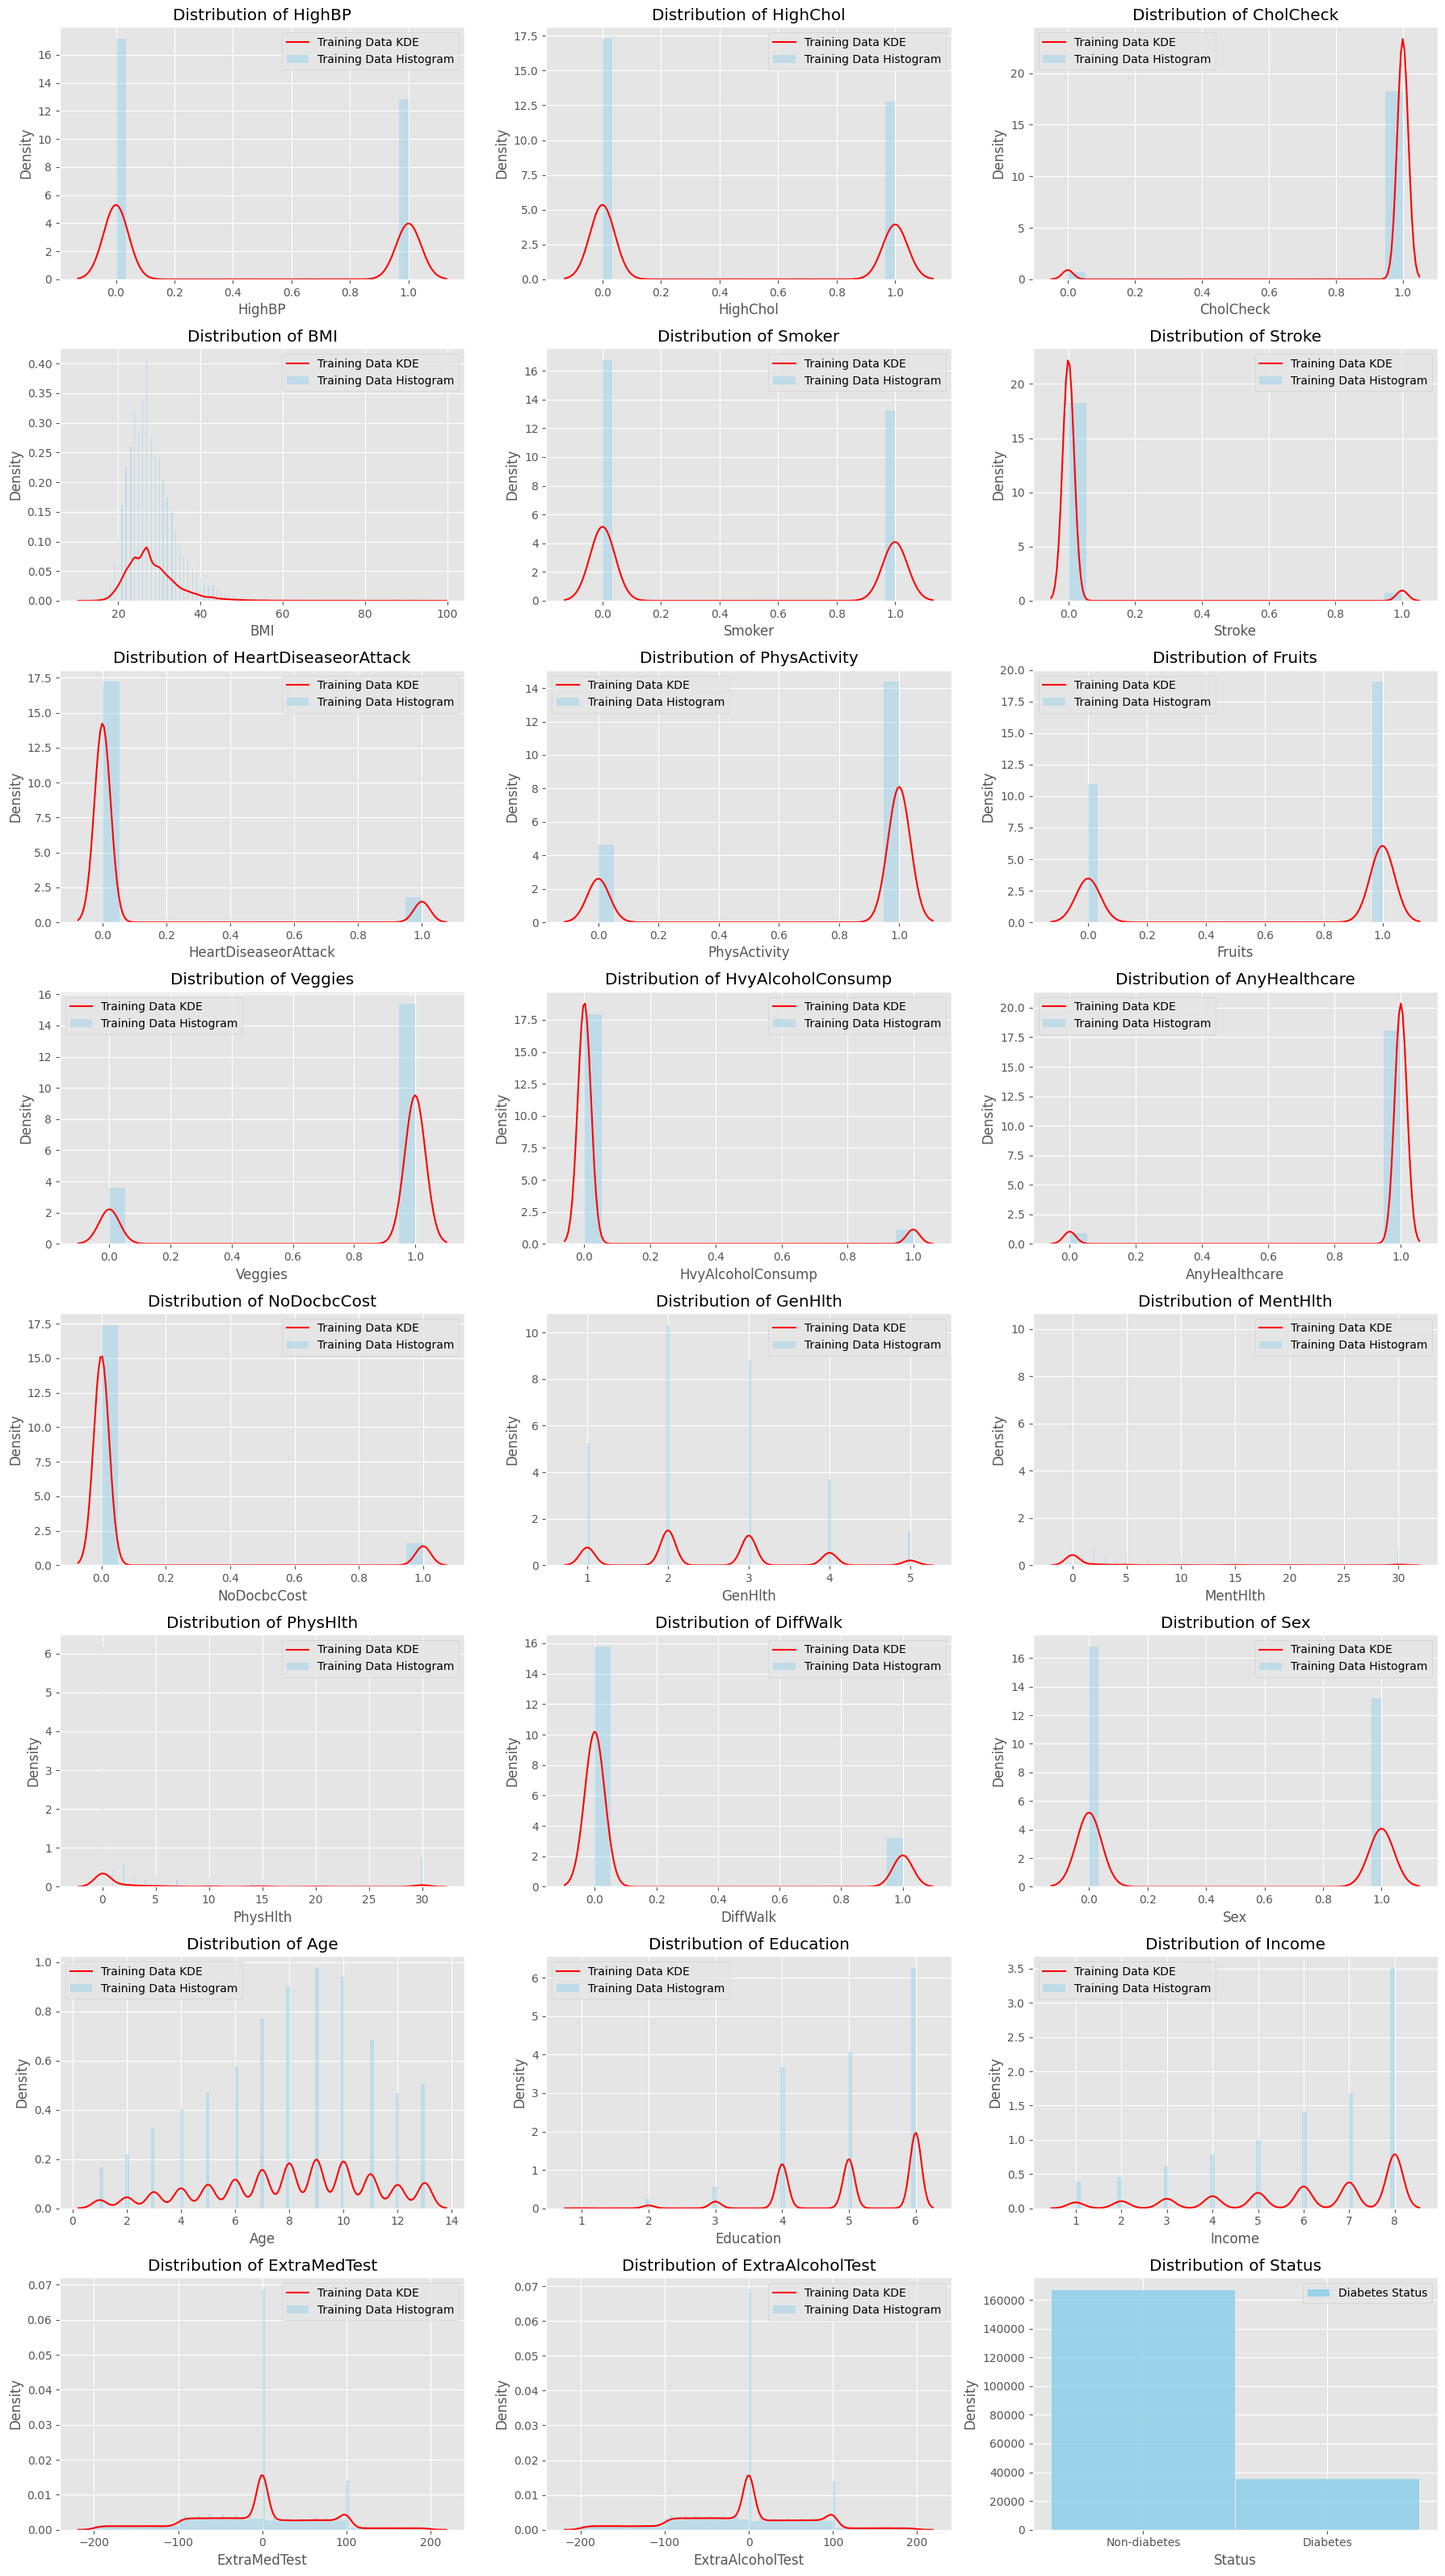

In [12]:
# Assuming df_train is your DataFrame
columns = df_train.columns
n_cols = 3  # Number of subplots per row
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Adjust the overall figure size as needed

for i, column in enumerate(columns, 1):  # Enumerate from 1 to manage subplot indexing
    plt.subplot(n_rows, n_cols, i)
    
    if column == 'Status':
        # Handle 'Status' column separately
        sns.histplot(df_train[column], bins=2, color="skyblue", alpha=0.8, label='Diabetes Status')
        plt.xticks([0.25, 0.75], labels=["Non-diabetes", "Diabetes"])
    else:
        # Plot the histogram with KDE for other columns
        sns.histplot(df_train[column], color="skyblue", label='Training Data Histogram', stat="density", linewidth=0, alpha=0.4)
        sns.kdeplot(df_train[column], color="red", label='Training Data KDE')
    
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


**Boxplot showcase**

C:\Users\Minh\AppData\Local\Temp\ipykernel_14356\3053067998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data=melted_df, palette="light:m_r", legend=False)


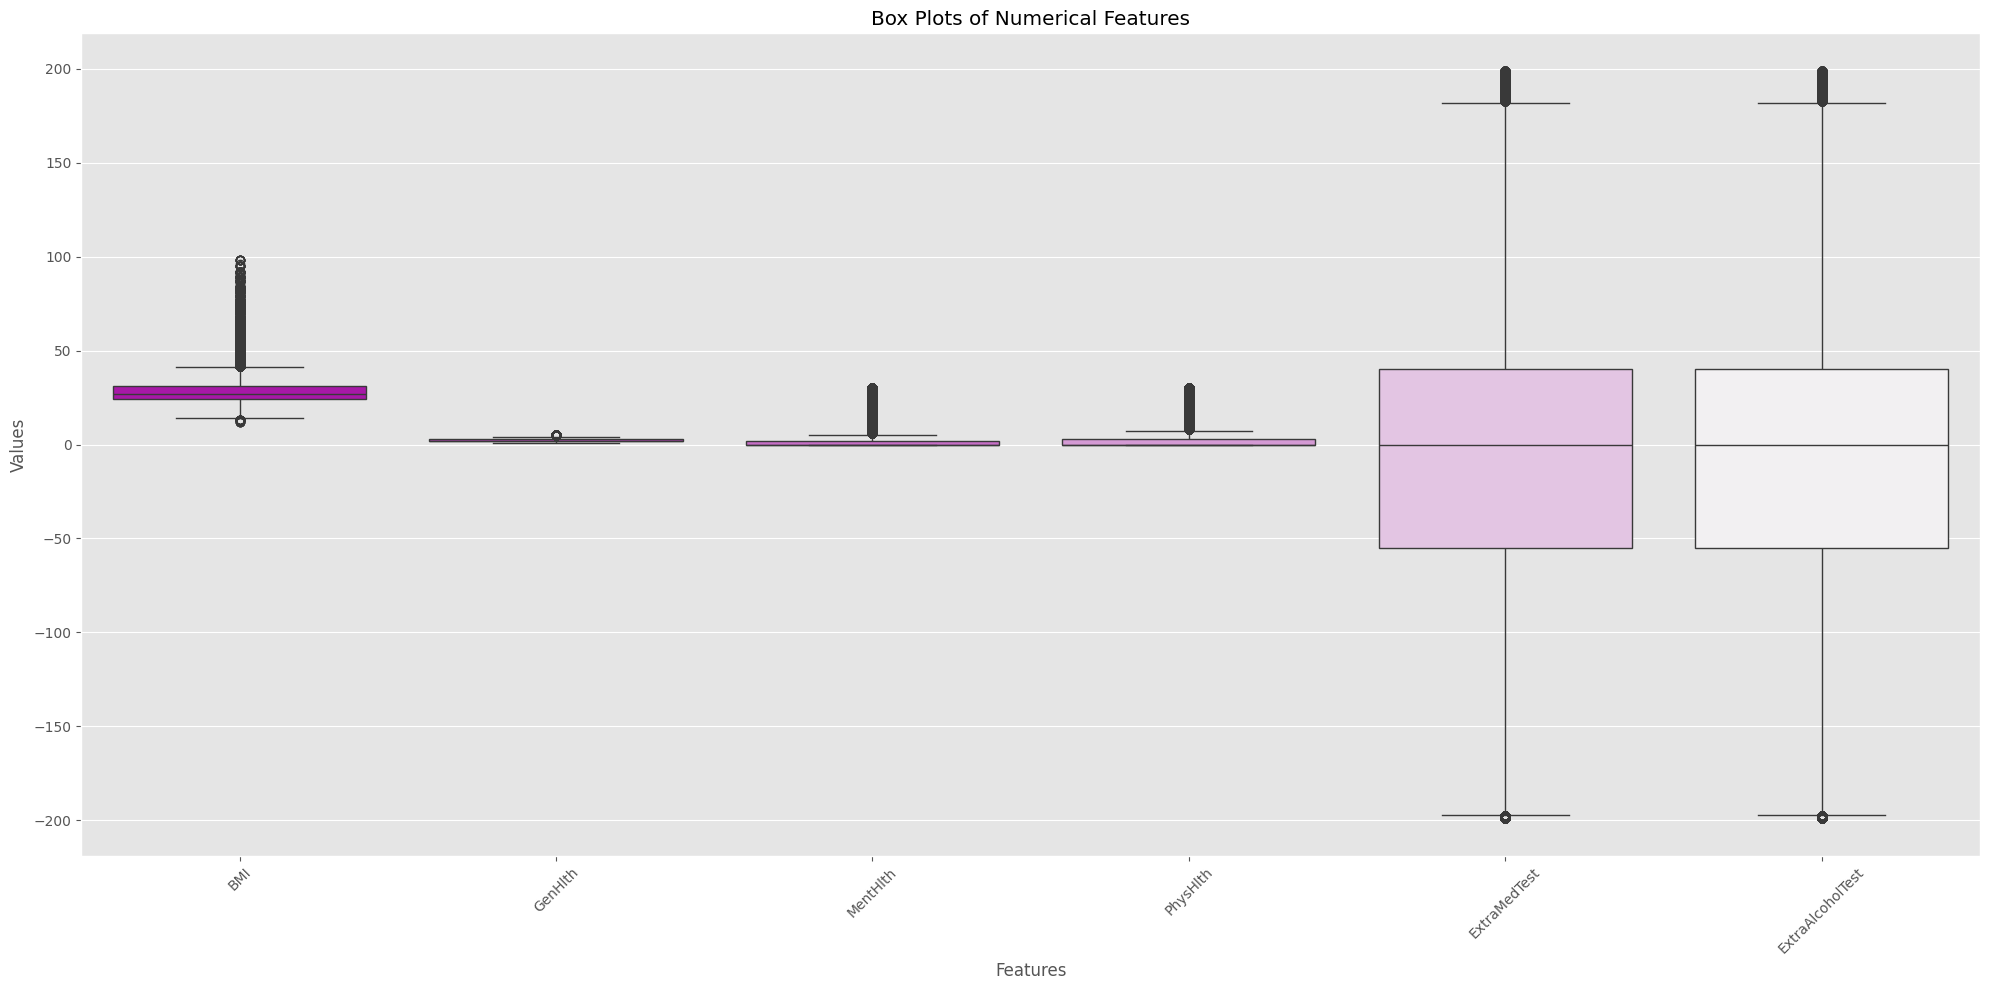

In [18]:
exclude_from_hist = ['Status', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                     'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                     'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
plt.figure(figsize=(20, 10))
melted_df = pd.melt(df_train, value_vars=[col for col in df_train.columns if col not in exclude_from_hist])
sns.boxplot(x='variable', y='value', data=melted_df, palette="light:m_r", legend=False)
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


### 2.1.0. Function to analyze the features

For the **Categorical Feature**, we only need to show the histogram only, while the **Numerical Features** will need to be analyzed via histogram, boxplot and distribution statistics.

In [19]:
def analyze_categorical_feature(feature, df_train, df_test):
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Combining train and test datasets for plotting
    combined_data = pd.concat([df_train[feature], df_test[feature]], keys=['Train', 'Test'])
    combined_data = combined_data.reset_index(level=0).rename(columns={'level_0': 'Dataset'})
    
    # Count plot for combined data
    sns.countplot(x=feature, hue='Dataset', data=combined_data, palette=['skyblue', 'magenta'])
    plt.title(f'Count Plot of {feature} - Train vs. Test')
    plt.ylabel('Count')
    plt.legend(title='Dataset')
    plt.show()

def analyze_numerical_feature(feature, df_train, df_test):
    plt.figure(figsize=(12, 6))
    combined_data = pd.concat([df_train[[feature]], df_test[[feature]]], keys=['Train', 'Test'])
    combined_data = combined_data.reset_index().rename(columns={'level_0': 'Dataset'})
    
    combined_data.drop(columns='level_1', inplace=True)
    # Plotting the combined histogram for Train and Test datasets
    sns.histplot(df_train[feature], kde=True, color='skyblue', label='Train', alpha=0.6, bins=30)
    sns.histplot(df_test[feature], kde=True, color='magenta', label='Test', alpha=0.6, bins=30)
    plt.title(f'Combined Histogram of {feature} - Train vs. Test')
    plt.legend(title='Dataset')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

# Plotting Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"], legend=False)
    plt.title(f'Combined Boxplot of {feature} - Train vs. Test')
    plt.xlabel('Dataset')
    plt.ylabel(feature)
    plt.show()

 # Print numerical statistics and outlier count for train dataset
    print(f"\nTrain Dataset - {feature} Statistics:\n{df_train[feature].describe()}\n")
    q1, q3 = np.percentile(df_train[feature].dropna(), [25, 75])
    iqr = q3 - q1
    outlier_count = ((df_train[feature] < (q1 - 1.5 * iqr)) | (df_train[feature] > (q3 + 1.5 * iqr))).sum()
    print(f"Number of outliers in Train Dataset: {outlier_count}")

    # Print numerical statistics and outlier count for test dataset
    print(f"\nTest Dataset - {feature} Statistics:\n{df_test[feature].describe()}\n")
    q1, q3 = np.percentile(df_test[feature].dropna(), [25, 75])
    iqr = q3 - q1
    outlier_count = ((df_test[feature] < (q1 - 1.5 * iqr)) | (df_test[feature] > (q3 + 1.5 * iqr))).sum()
    print(f"Number of outliers in Test Dataset: {outlier_count}")


### 2.1.a Distribution of HighBP

Blood Pressure

No High = 0; High = 1

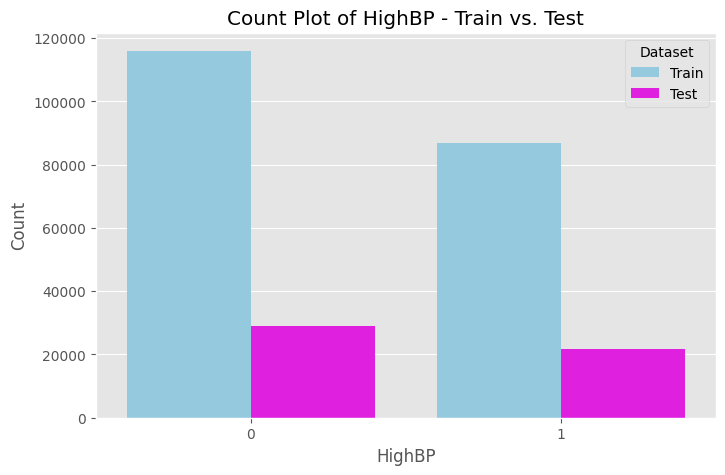

In [15]:
analyze_categorical_feature("HighBP", df_train, df_test)


**Observation**

- *Data Distribution:* Normal distribution for both train data and test data, slightly right skewed.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Visualization observation:* Not many people has high blood pressure.

No further transformation required.

### 2.1.2 Distribution of HighChol

Cholesterol

No High = 0;  High = 1

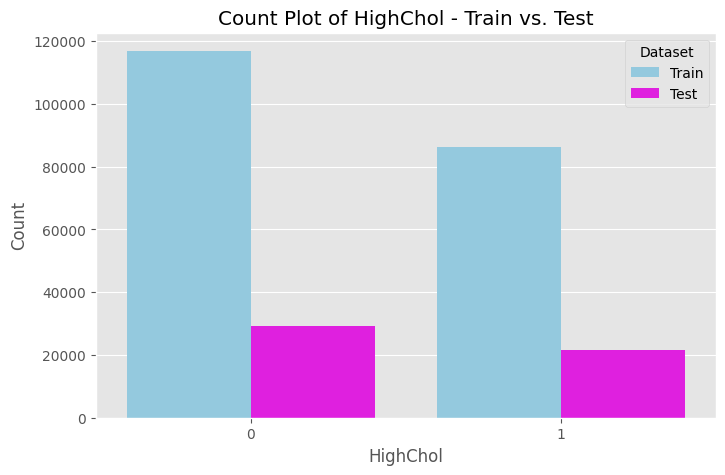

In [16]:
analyze_categorical_feature("HighChol", df_train, df_test)

**Observation**

*Distribution:* Normal distribution for both train data and test data, slightly right skewed.

No further transformation required.

### 2.1.3 Distribution of CholCheck

Cholesterol check in 5 years

No check = 0; checked = 1

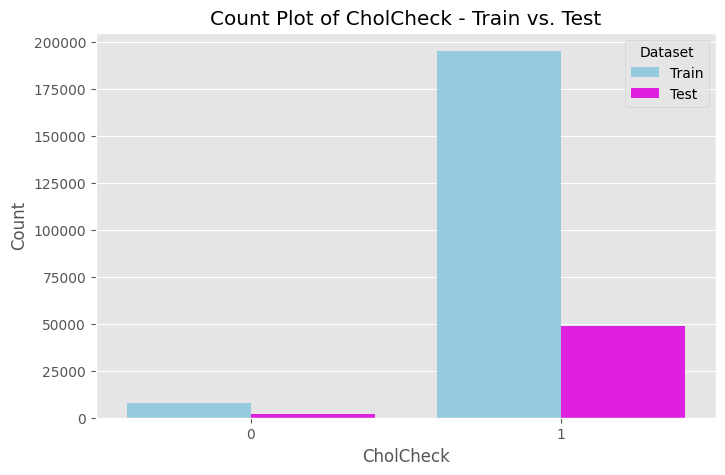

In [17]:
analyze_categorical_feature("CholCheck", df_train, df_test)

**Observation**

- *Data Distribution:* The trend is towards `1` value, lead to the imbalance in one category, left skewed.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.4 Distribution of BMI

BMI: Body Mass Index

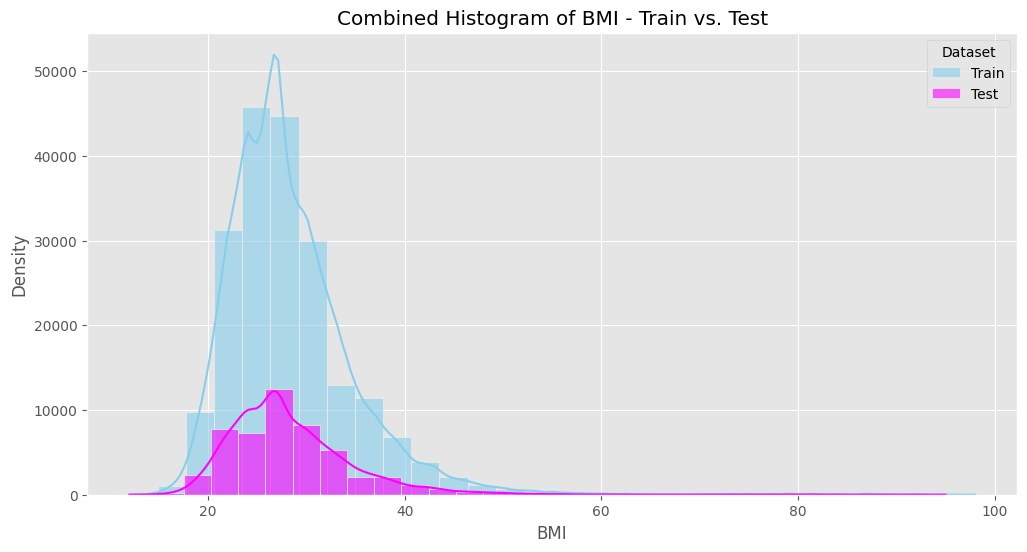

C:\Users\Minh\AppData\Local\Temp\ipykernel_1352\4024600968.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"])


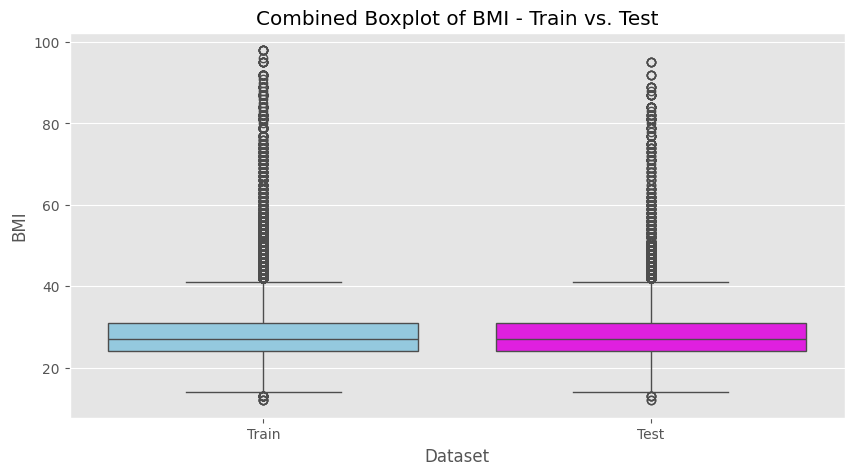


Train Dataset - BMI Statistics:
count    202944.000000
mean         28.379824
std           6.612738
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

Number of outliers in Train Dataset: 7859

Test Dataset - BMI Statistics:
count    50736.000000
mean        28.392522
std          6.592550
min         12.000000
25%         24.000000
50%         27.000000
75%         31.000000
max         95.000000
Name: BMI, dtype: float64

Number of outliers in Test Dataset: 1988


In [18]:
analyze_numerical_feature("BMI", df_train, df_test)

**Observation**

- *Data Distribution:* Normally distributed with a trend towards higher BMI value on the left.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* There are a few outliers, mostly on the higher end of the BMI scale
- *Boxplot Analysis*: Reveals a decent amount of outliers; there are slightly different in the test and train dataset but not worth consider.
- The mean and median are similar.

No further transformation required.

### 2.1.5 Distribution of Smoker

Smoked at least 100 cigarettes (5 packs = 100 cigarettes):

Not yet = 0; Yes = 1

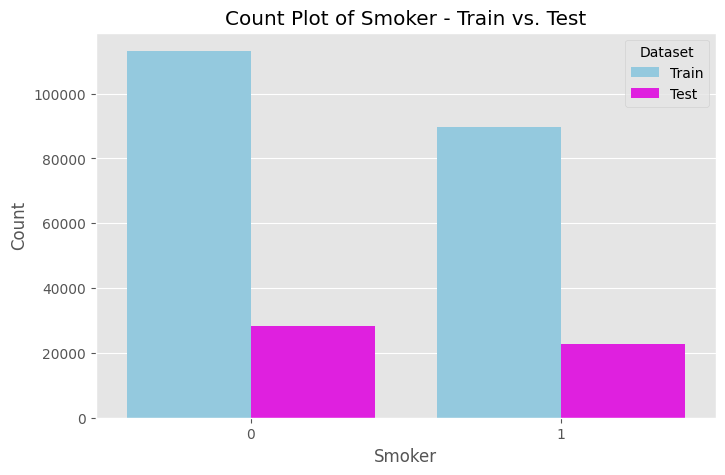

In [19]:
analyze_categorical_feature("Smoker", df_train, df_test)

**Observation**

- *Data Distribution:* Normally distributed, a little skewed to the right.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.6 Distribution of Stroke

Ever had a stroke:

Not yet = 0; yes = 1

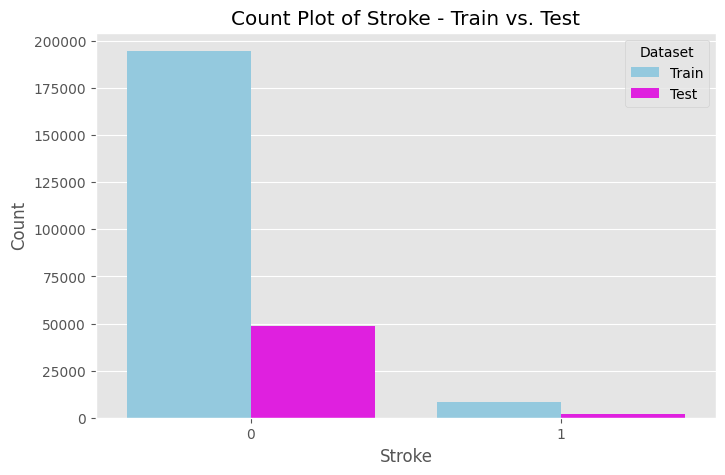

In [20]:
analyze_categorical_feature("Stroke", df_train, df_test)

**Observation**

- *Data Distribution:* Imbalance with  a much higher count toward individuals who have not had a stroke compared to those who have.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.7 Distribution of HeartDiseaseorAttack

Coronary heart disease (CHD) or myocardial infarction (MI)

No = 0; Yes = 1

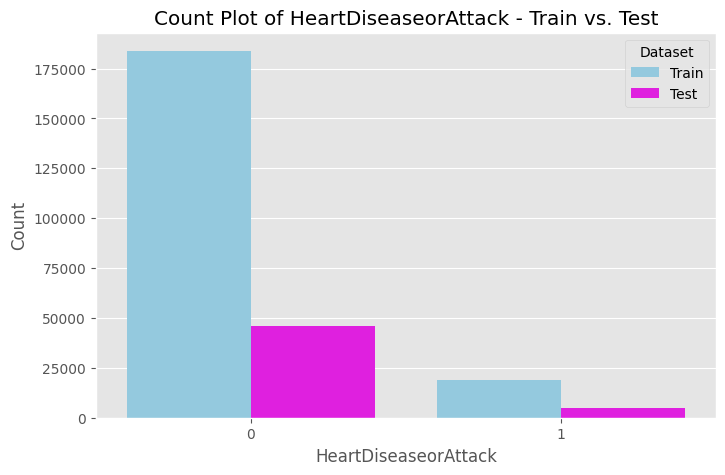

In [21]:
analyze_categorical_feature("HeartDiseaseorAttack", df_train, df_test)

### 2.1.8 Distribution of PhysActivity

Physical activity in past 30 days (not including job):

No = 0; Yes = 1

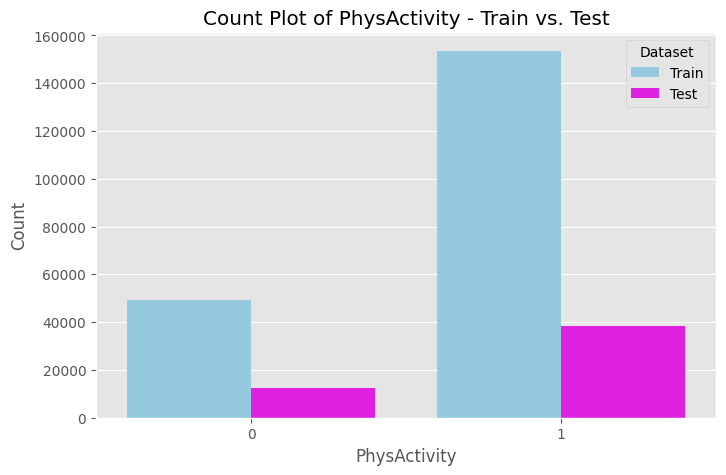

In [22]:
analyze_categorical_feature("PhysActivity", df_train, df_test)

**Observation**

- *Data Distribution:* Data imbalance, skewed to the left.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.9 Distribution of Fruits

Consume fruit one or more times per day:

No = 0; Yes = 1

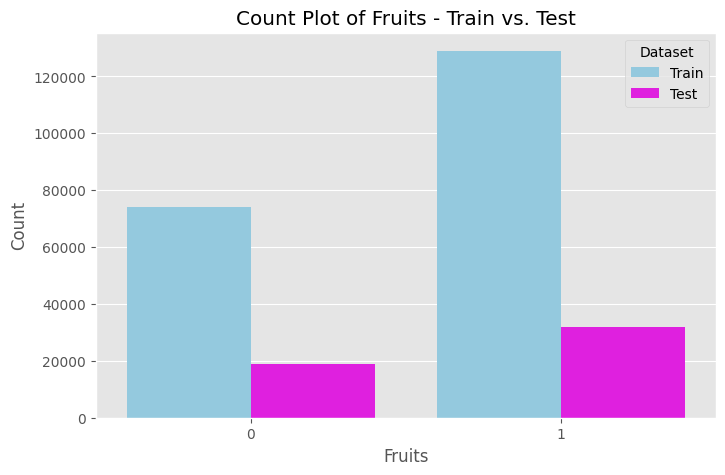

In [23]:
analyze_categorical_feature("Fruits", df_train, df_test)

**Observation**

- *Data Distribution:* Normal distribution, a little skewed to the left
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.10 Distribution of Veggies

Consume vegetables 1 or more times per day

No = 0; Yes = 1

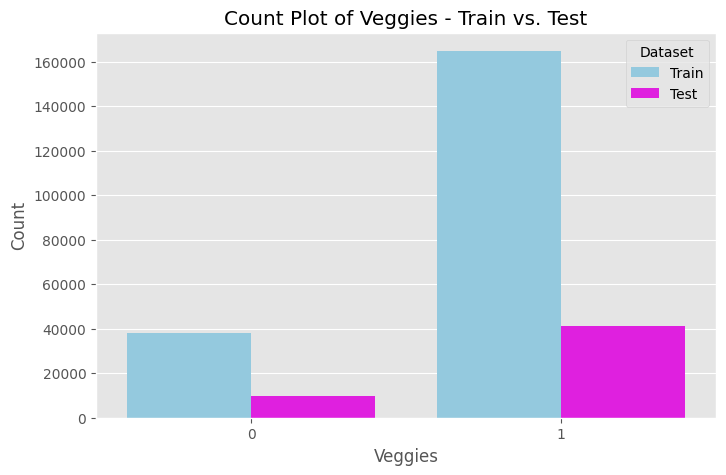

In [24]:
analyze_categorical_feature("Veggies", df_train, df_test)

**Observation**

- *Data Distribution:* Data imbalance, skewed to the left.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.11 Distribution of HvyAlcoholConsump

Heavy drinkers (adult men having more than 14 drinks per weeks and adult women having more than 7 drinks per week):

No = 0; Yes = 1

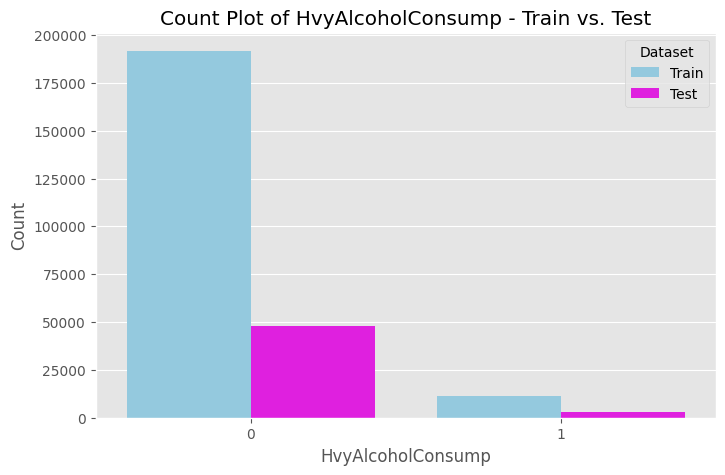

In [25]:
analyze_categorical_feature("HvyAlcoholConsump", df_train, df_test)

**Observation**

- *Data Distribution:* Data imbalance with a much smaller number of individuals not having heavy alcohol consumption.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.12 Distribution of AnyHealthcare

Have any kind of health care coverage

No = 0; Yes = 1

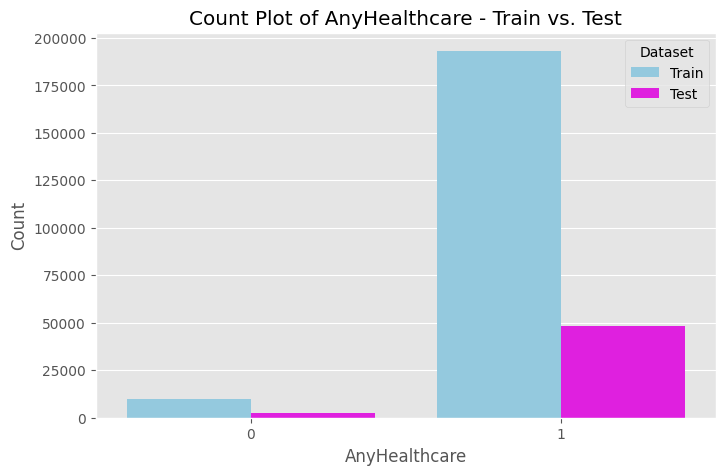

In [26]:
analyze_categorical_feature("AnyHealthcare", df_train, df_test)

**Observation**

- *Data Distribution:* Data imbalance with a much smaller number of individuals having any healthcare coverage, skewed to the left.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.13 Distribution of NoDocbcCost

Was there a time in the past 12 months when you needed to see a doctor but could not cause of cost?

No = 0; Yes = 1

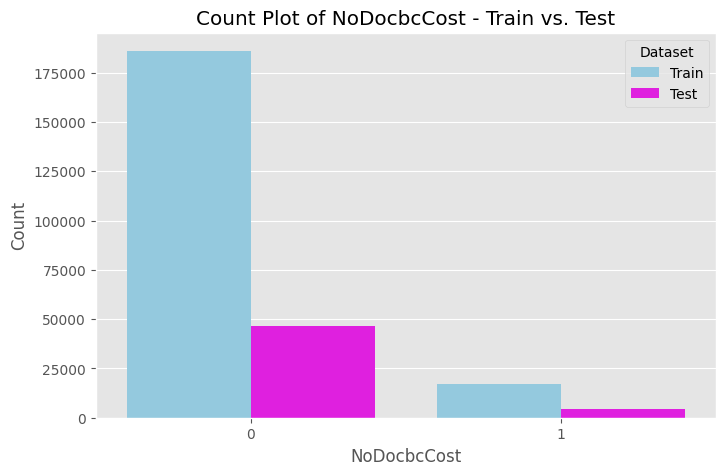

In [27]:
analyze_categorical_feature("NoDocbcCost", df_train, df_test)

**Observation**

- *Data Distribution:* Data imbalance with a much smaller number of individuals cannot see a doctor cause of cost, skewed to the right.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.14 Distribution of GenHlth

Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

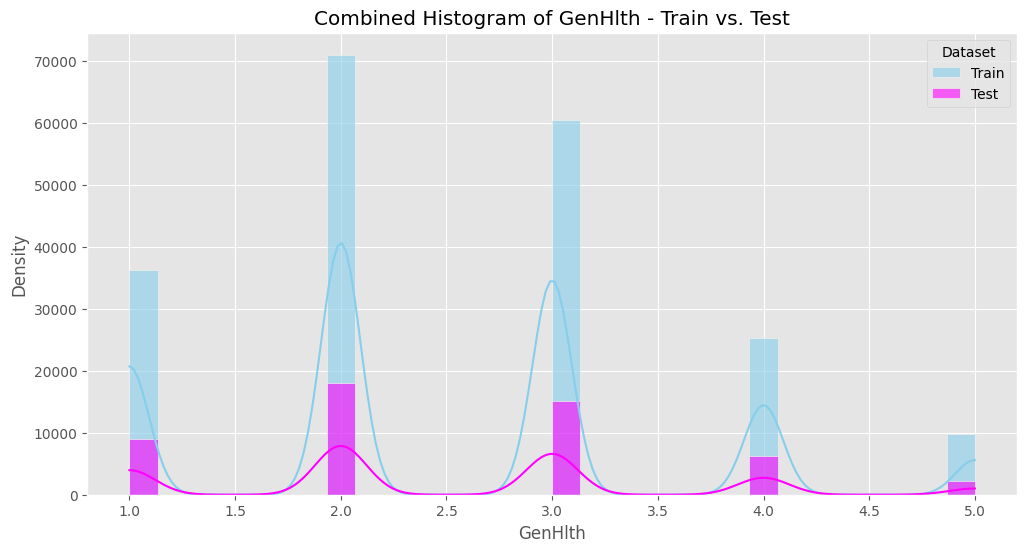

C:\Users\Minh\AppData\Local\Temp\ipykernel_1352\4024600968.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"])


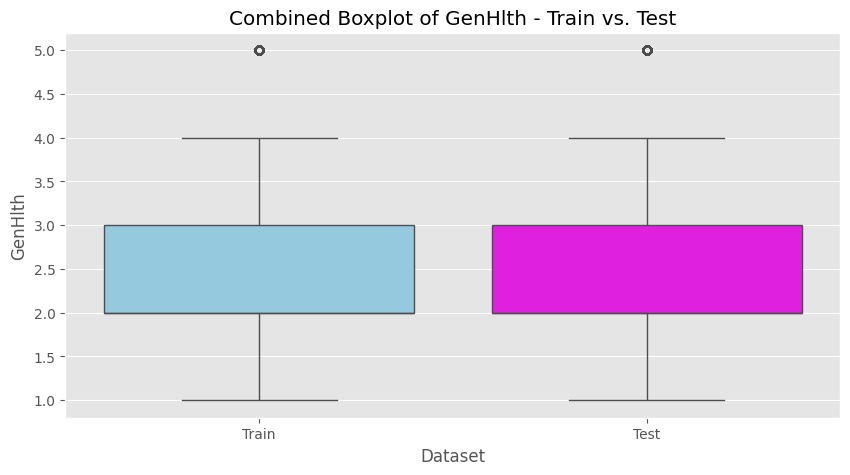


Train Dataset - GenHlth Statistics:
count    202944.000000
mean          2.514024
std           1.070370
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64

Number of outliers in Train Dataset: 9790

Test Dataset - GenHlth Statistics:
count    50736.000000
mean         2.500867
std          1.060819
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: GenHlth, dtype: float64

Number of outliers in Test Dataset: 2291


In [28]:
analyze_numerical_feature("GenHlth", df_train, df_test)

**Observation**

- *Data Distribution:* Normally distributed with a peak falling into `2` (very good) and `3` (good).
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* There are a few outliers, mostly on the worst general heath condition
- *Boxplot Analysis*: Reveals a decent amount of outliers; there are slightly different in the test and train dataset but not worth consider.

### 2.1.15 Distribution of MentHlth

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

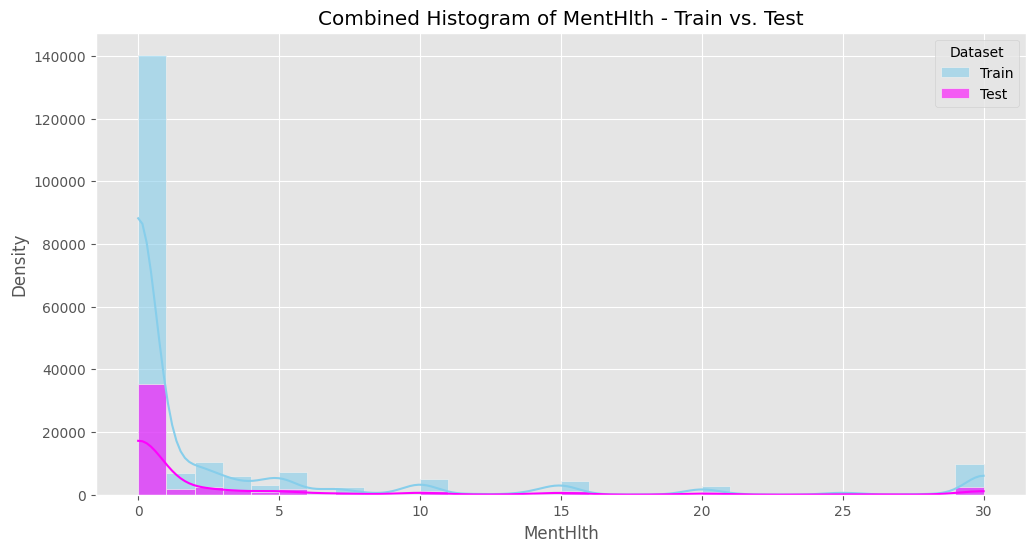

C:\Users\Minh\AppData\Local\Temp\ipykernel_1352\4024600968.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"])


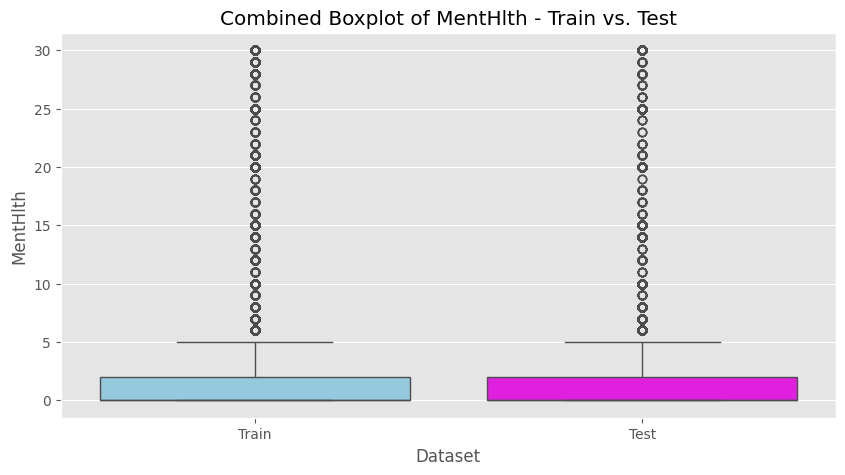


Train Dataset - MentHlth Statistics:
count    202944.000000
mean          3.196971
std           7.427247
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64

Number of outliers in Train Dataset: 29056

Test Dataset - MentHlth Statistics:
count    50736.000000
mean         3.135978
std          7.354835
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MentHlth, dtype: float64

Number of outliers in Test Dataset: 7152


In [29]:
analyze_numerical_feature("MentHlth", df_train, df_test)

**Observation**

- *Data Distribution:* The distribution of reported poor mental health days is heavily right-skewed in both the training and testing datasets. A large number of individuals report zero or very few poor mental health days.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* There are a few outliers, mostly on the worst general heath condition
- *Boxplot Analysis*: Reveals a decent amount of outliers; there are slightly different in the test and train dataset but not worth consider.

### 2.1.16 Distribution of PhysHlth

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

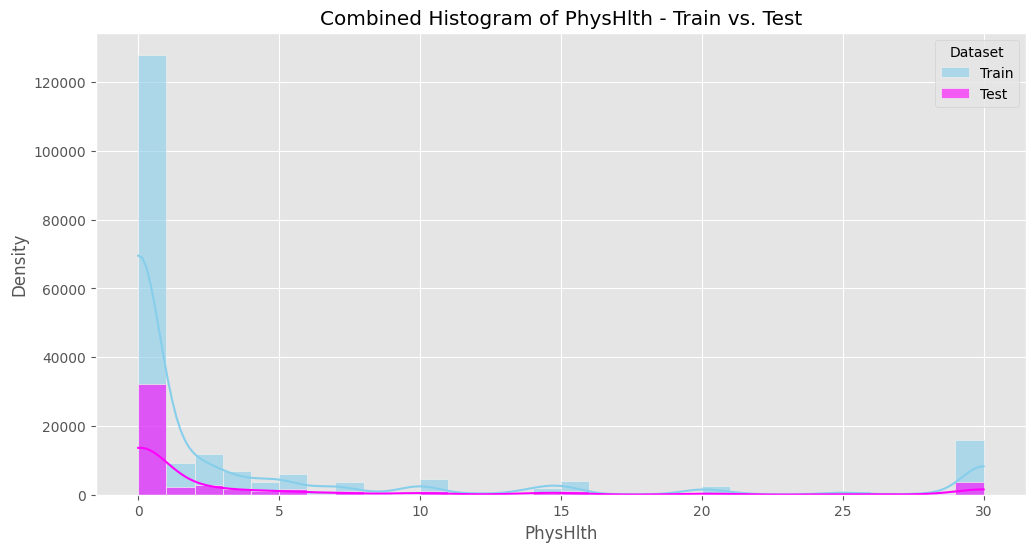

C:\Users\Minh\AppData\Local\Temp\ipykernel_14356\2421785384.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"], legend=False)


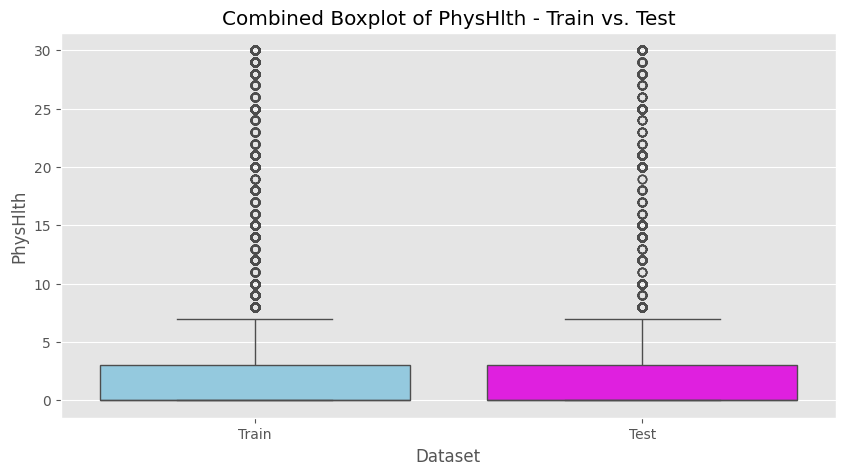


Train Dataset - PhysHlth Statistics:
count    202944.000000
mean          4.256455
std           8.736665
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysHlth, dtype: float64

Number of outliers in Train Dataset: 32909

Test Dataset - PhysHlth Statistics:
count    50736.000000
mean         4.184583
std          8.642537
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PhysHlth, dtype: float64

Number of outliers in Test Dataset: 8040


In [20]:
analyze_numerical_feature("PhysHlth", df_train, df_test)

**Observation**

- *Data Distribution:* The right-skewed histograms suggest most people report few poor physical health days.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* The boxplots show outliers, with some individuals reporting many poor health days.
- *Boxplot Analysis*: Median values are low, but the spread of data indicates variability in health days reported.

### 2.1.16 Distribution of DiffWalk

Do you have serious difficulty walking or climbing stairs?

0 = no 1 = yes

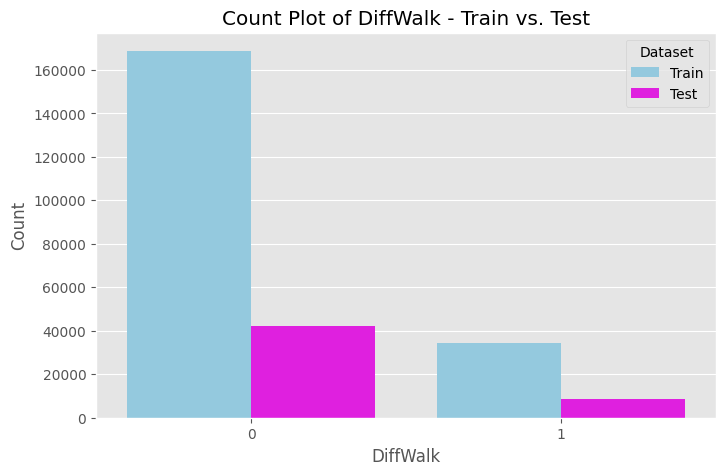

In [31]:
analyze_categorical_feature("DiffWalk", df_train, df_test)

**Observation**

- *Data Distribution:* Data imbalance with a much smaller number of individuals cannot walk or climbing stairs, skewed to the right.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.18 Distribution of Sex

0 = female; 1 = male

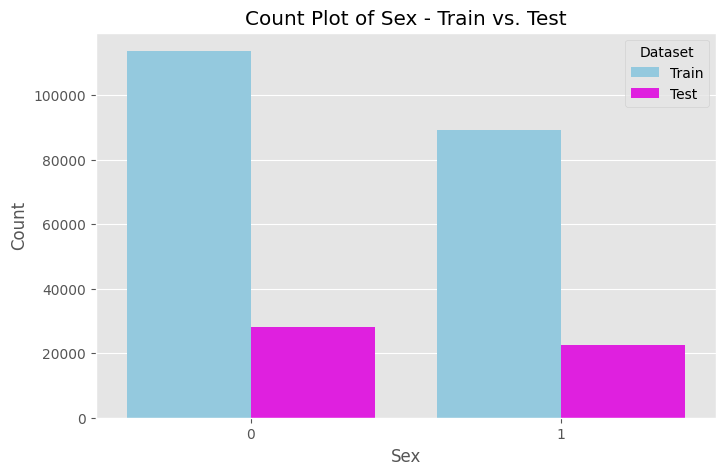

In [32]:
analyze_categorical_feature("Sex", df_train, df_test)

**Observation**

- *Data Distribution:* Data are somewhat equally distributed with a slightly smaller number of individuals who are male, skewed to the right.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.

No further transformation required.

### 2.1.19 Distribution of Age

13-level age category: 1 = 18-24 9 = 60-64 13 = 80 or older

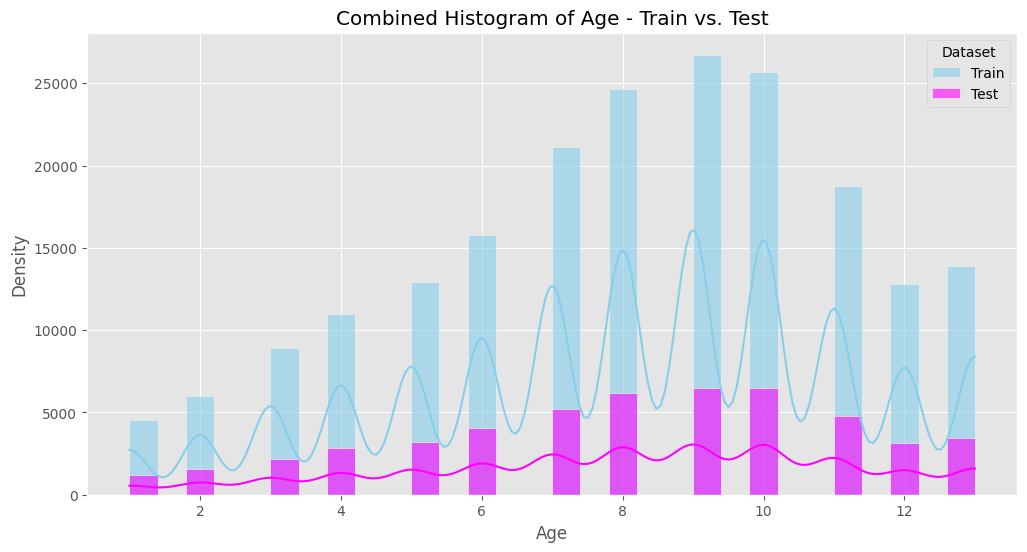

C:\Users\Minh\AppData\Local\Temp\ipykernel_1352\4024600968.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"])


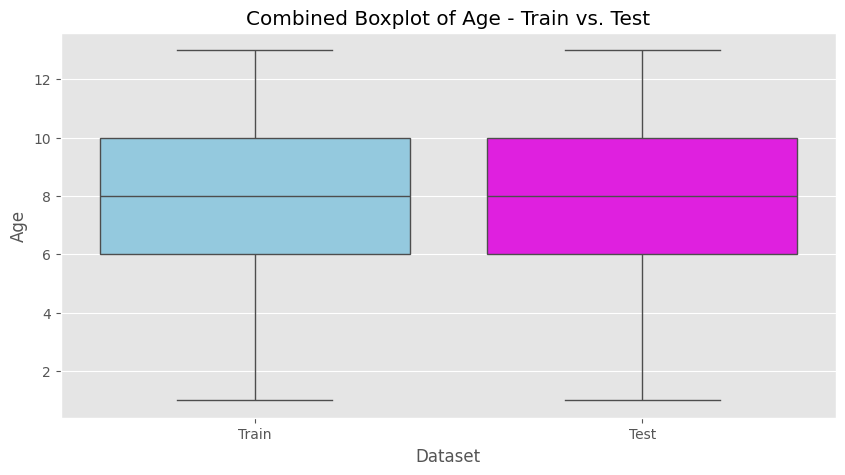


Train Dataset - Age Statistics:
count    202944.000000
mean          8.037449
std           3.051568
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64

Number of outliers in Train Dataset: 0

Test Dataset - Age Statistics:
count    50736.000000
mean         8.010801
std          3.064743
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         13.000000
Name: Age, dtype: float64

Number of outliers in Test Dataset: 0


In [33]:
analyze_numerical_feature("Age", df_train, df_test)

**Observation**

- *Data Distribution:* The histogram reveals a multimodal distribution with several peaks, indicating that certain age groups are more prevalent in the dataset.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* No outliers are present in this categorical representation of age, which is expected as age is grouped into categories.
- *Boxplot Analysis*: The boxplot shows a wider interquartile range in the test dataset, which may indicate a more varied age representation in the test data.

No further transformation required.

### 2.1.20 Distribution of Education

Education level: scale 1-6 
1 = Never attended school or only kindergarten 
2 = Grades 1 through 8 (Elementary) 
3 = Grades 9 through 11 (Some high school) 
4 = Grade 12 or GED (High school graduate) 
5 = College 1 year to 3 years (Some college or technical school) 
6 = College 4 years or more (College graduate)

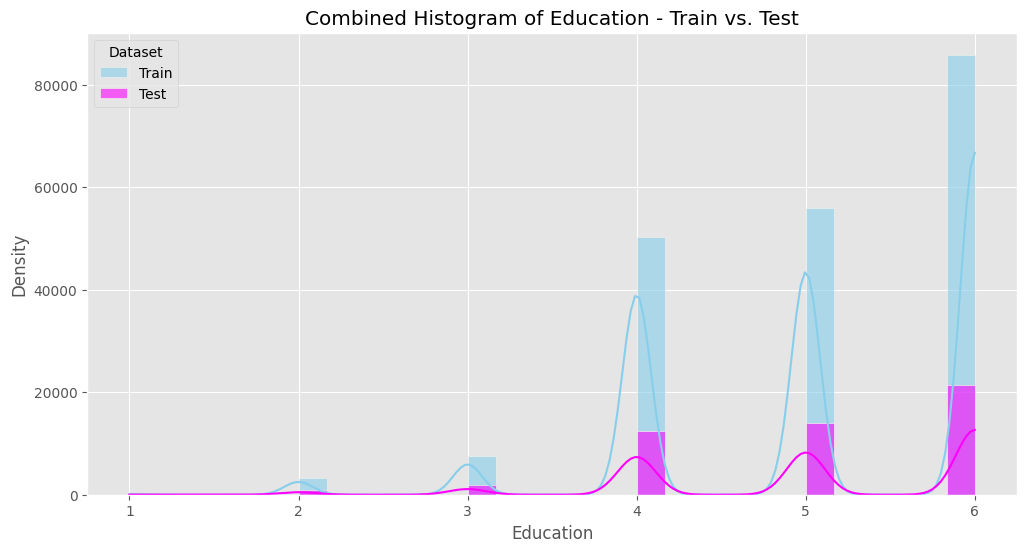

C:\Users\Minh\AppData\Local\Temp\ipykernel_1352\4024600968.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"])


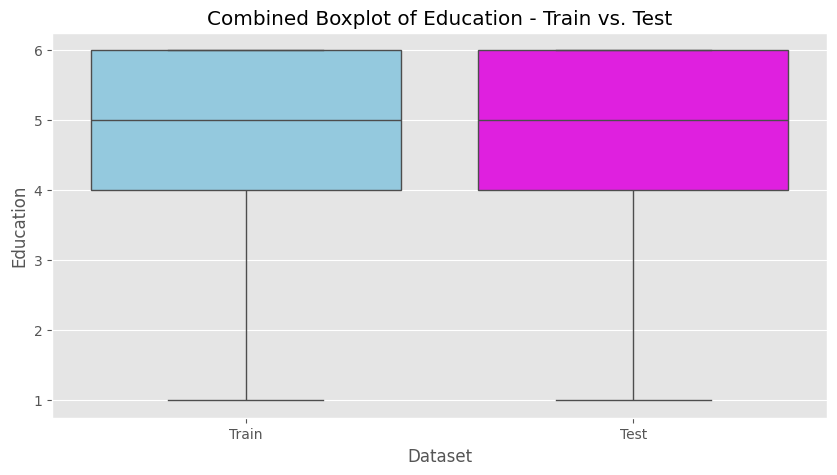


Train Dataset - Education Statistics:
count    202944.000000
mean          5.050245
std           0.985601
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: Education, dtype: float64

Number of outliers in Train Dataset: 0

Test Dataset - Education Statistics:
count    50736.000000
mean         5.051187
std          0.986477
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: Education, dtype: float64

Number of outliers in Test Dataset: 0


In [34]:
analyze_numerical_feature("Education", df_train, df_test)

**Observation**

- *Data Distribution:* The histogram displays a categorical distribution with noticeable peaks, indicating that some education levels are more common than others.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* The boxplot does not show outliers, which is consistent with the categorical nature of the 'Education' variable.
- *Boxplot Analysis*: The boxplot indicates that the median education level is higher in the test dataset compared to the train dataset, with a wider interquartile range in the test dataset, suggesting more variability.

No further transformation required.

### 2.1.21 Distribution of Income

Scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

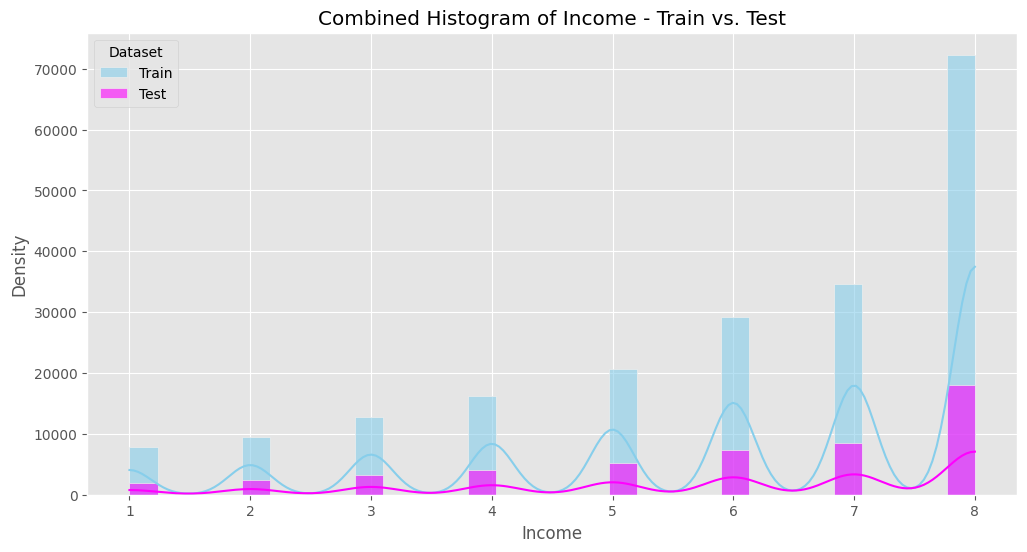

C:\Users\Minh\AppData\Local\Temp\ipykernel_1352\4024600968.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"])


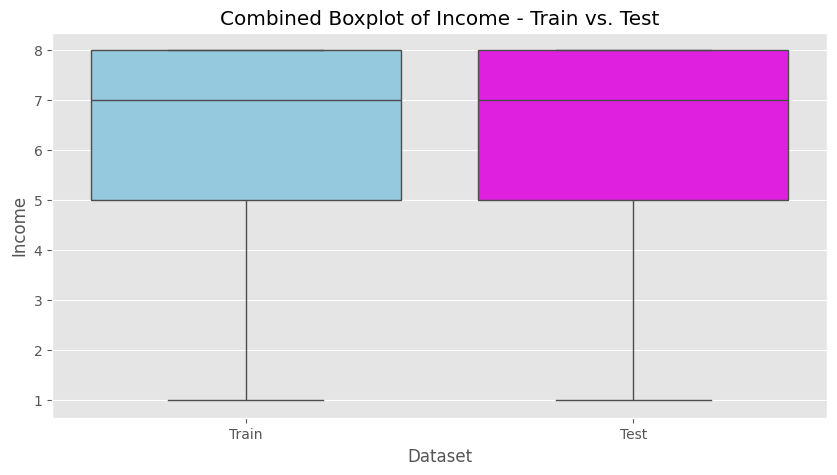


Train Dataset - Income Statistics:
count    202944.000000
mean          6.055641
std           2.070140
min           1.000000
25%           5.000000
50%           7.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64

Number of outliers in Train Dataset: 0

Test Dataset - Income Statistics:
count    50736.000000
mean         6.046811
std          2.075180
min          1.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          8.000000
Name: Income, dtype: float64

Number of outliers in Test Dataset: 0


In [35]:
analyze_numerical_feature("Income", df_train, df_test)

**Observation**

- *Data Distribution:* The combined histogram for 'Income' shows a multimodal distribution with peaks at different income levels, indicating varied income groups in the datasets.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* As 'Income' is a categorical variable, the boxplot does not show any outliers, which fits the expected pattern of this kind of data.
- *Boxplot Analysis*: The boxplot reveals that the median income level in the test dataset is higher than in the training dataset. The test dataset also displays a greater spread of income levels, suggesting more diversity in income categories.

No further transformation required.

### 2.1.22 Distribution of ExtraMedTest

The result of an extra medical test, range (-100, 100)


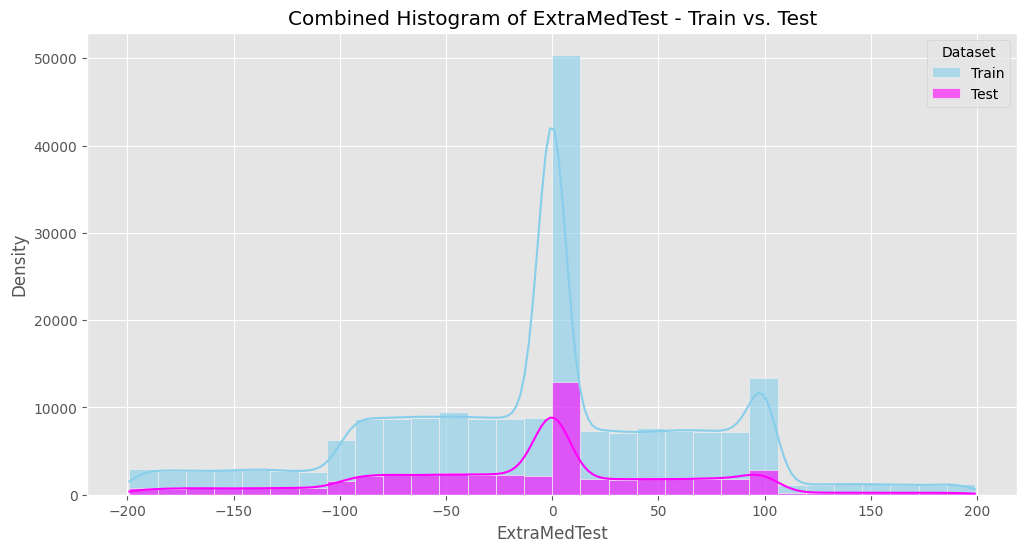

C:\Users\Minh\AppData\Local\Temp\ipykernel_1352\4024600968.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"])


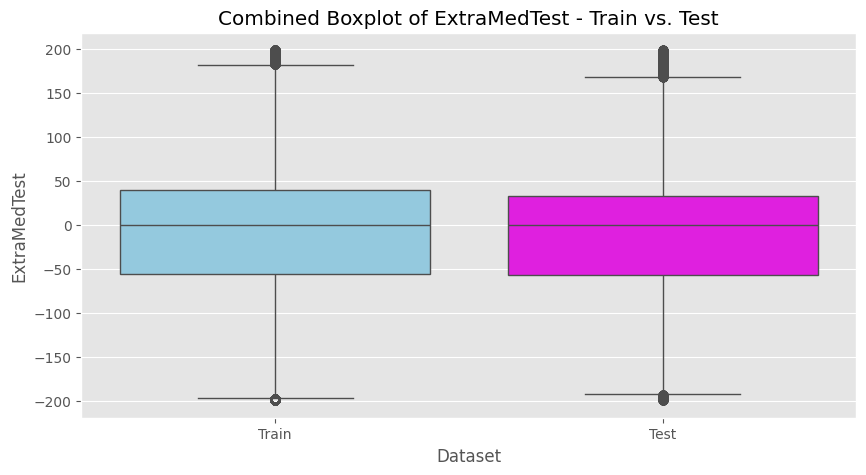


Train Dataset - ExtraMedTest Statistics:
count    202944.000000
mean         -7.408660
std          75.993743
min        -199.000000
25%         -55.000000
50%           0.000000
75%          40.000000
max         199.000000
Name: ExtraMedTest, dtype: float64

Number of outliers in Train Dataset: 2002

Test Dataset - ExtraMedTest Statistics:
count    50736.000000
mean       -10.972189
std         74.323238
min       -199.000000
25%        -57.000000
50%          0.000000
75%         33.000000
max        199.000000
Name: ExtraMedTest, dtype: float64

Number of outliers in Test Dataset: 901


In [36]:
analyze_numerical_feature("ExtraMedTest", df_train, df_test)

**Observation**

- *Data Distribution:* The histogram of 'ExtraMedTest' indicates a normal distribution centered around zero, with a few significant spikes, notably one large spike just below zero in the train dataset.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* Both the training and test datasets show outliers as evidenced by the points beyond the whiskers of the boxplots. These outliers are present on both the negative and positive sides of the scale, indicating extreme values in the results of the ExtraMedTest.
- *Boxplot Analysis*: The boxplots for both datasets show a median close to zero with the test dataset having a slightly higher median. The spread (interquartile range) is similar in both datasets, although the test dataset shows a larger range of extreme values.

Based on the code_book, the range value of this feature would be in (-100,100) only, so all value outside the range will have to be eliminated.

In [37]:
within_range = df_train[(df_train['ExtraMedTest'].between(-100, 100))]
outside_range = df_train[~(df_train['ExtraMedTest'].between(-100, 100))]

print("Number of rows within the range (-100, 100):", len(within_range))
print("Number of rows outside the range (-100, 100):", len(outside_range))

within_range_test = df_test[(df_test['ExtraMedTest'].between(-100, 100))]
outside_range_test = df_test[~(df_test['ExtraMedTest'].between(-100, 100))]

print("Number of rows in test dataset within the range (-100, 100):", len(within_range_test))
print("Number of rows in test dataset outside the range (-100, 100):", len(outside_range_test))

# Drop the rows outside the specified range
# df_train = df_train(df_train['ExtraAlcoholTest'].between(-100, 100)) 

Number of rows within the range (-100, 100): 173429
Number of rows outside the range (-100, 100): 29515
Number of rows in test dataset within the range (-100, 100): 43549
Number of rows in test dataset outside the range (-100, 100): 7187


### 2.1.23 Distribution of ExtraAlcoholTest

The result of an extra alcohol test, range (-100, 100)

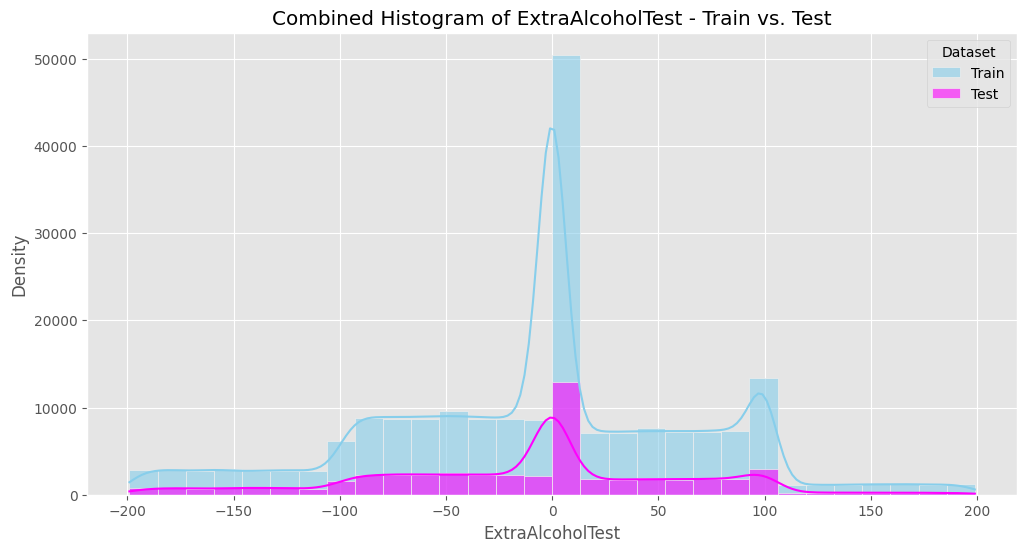

C:\Users\Minh\AppData\Local\Temp\ipykernel_1352\4024600968.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Dataset', y=feature, palette=["skyblue", "magenta"])


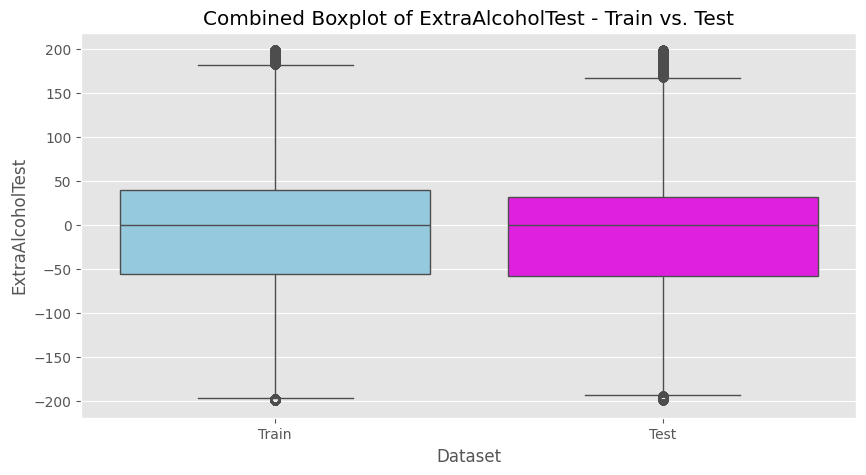


Train Dataset - ExtraAlcoholTest Statistics:
count    202944.000000
mean         -7.560041
std          75.927137
min        -199.000000
25%         -55.000000
50%           0.000000
75%          40.000000
max         199.000000
Name: ExtraAlcoholTest, dtype: float64

Number of outliers in Train Dataset: 1899

Test Dataset - ExtraAlcoholTest Statistics:
count    50736.000000
mean       -11.429202
std         74.525657
min       -199.000000
25%        -58.000000
50%          0.000000
75%         32.000000
max        199.000000
Name: ExtraAlcoholTest, dtype: float64

Number of outliers in Test Dataset: 870


In [38]:
analyze_numerical_feature("ExtraAlcoholTest", df_train, df_test)

**Observation**

- *Data Distribution:* The combined histogram shows that most of the data points for both train and test datasets cluster around zero, but there's a notable peak just below zero in the train dataset. The distribution tails off as the values move away from zero, indicating fewer extreme test results.
- *Consistency Across Datasets:* Both the train and test datasets has similar distributions.
- *Outliers:* The boxplots reveal a significant number of outliers on both sides of the distribution for both datasets. This is typical for medical test data where a small number of individuals may have extreme values.
- *Boxplot Analysis*: The boxplot shows that the median of the test dataset is slightly shifted towards the negative, suggesting that the test group might have lower alcohol test results compared to the train dataset. The interquartile range is similar for both, but the test dataset's box is slightly tighter, indicating less variability in the middle 50% of the data.

Based on the code_book, the range value of this feature would be in (-100,100) only, so all value outside the range will have to be eliminated.

In [39]:
within_range = df_train[(df_train['ExtraAlcoholTest'].between(-100, 100))]
outside_range = df_train[~(df_train['ExtraAlcoholTest'].between(-100, 100))]

print("Number of rows within the range (-100, 100):", len(within_range))
print("Number of rows outside the range (-100, 100):", len(outside_range))

within_range_test = df_test[(df_test['ExtraAlcoholTest'].between(-100, 100))]
outside_range_test = df_test[~(df_test['ExtraAlcoholTest'].between(-100, 100))]

print("Number of rows in test dataset within the range (-100, 100):", len(within_range_test))
print("Number of rows in test dataset outside the range (-100, 100):", len(outside_range_test))

# Drop the rows outside the specified range
# df_train = df_train(df_train['ExtraAlcoholTest'].between(-100, 100)) 

Number of rows within the range (-100, 100): 173480
Number of rows outside the range (-100, 100): 29464
Number of rows in test dataset within the range (-100, 100): 43523
Number of rows in test dataset outside the range (-100, 100): 7213


### 2.1.24 Distribution of Status

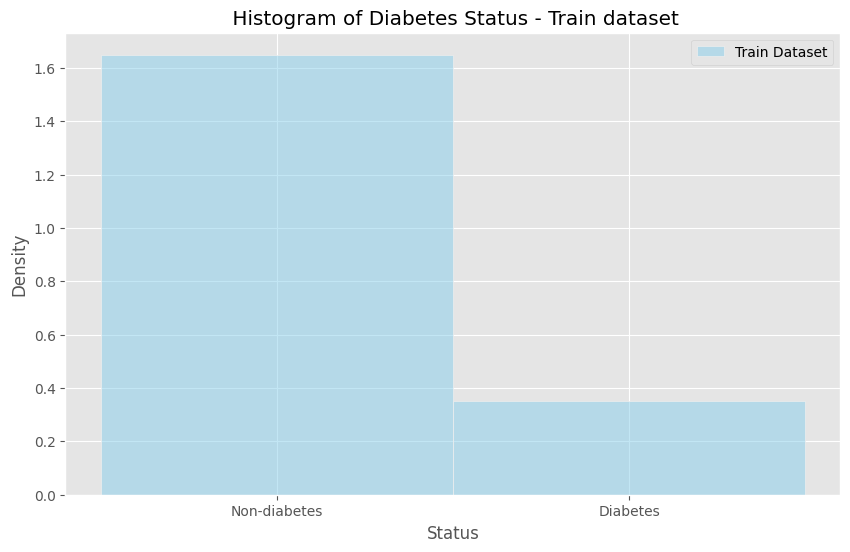

17.56% of patients had diabetes or will have diabetes.
82.44% of patients had not had diabetes 


In [40]:
# Assuming df_train and df_test are your DataFrame
plt.figure(figsize=(10, 6))
    
# Plotting histogram for the training dataset with adjusted transparency
sns.histplot(df_train["Status"], bins=2, color="skyblue", alpha=0.5, label='Train Dataset', stat="density")


# Customizing the plot
plt.xticks([0.25, 0.75], labels=["Non-diabetes", "Diabetes"])
plt.xlabel("Status")
plt.ylabel('Density')
plt.title(f' Histogram of Diabetes Status - Train dataset')
plt.legend()
plt.show()

diabetesCount = len(df_train[df_train["Status"] == 1])
nonDiabetesCount = len(df_train[df_train["Status"] == 0])
print(f"{(diabetesCount / (len(df_train['Status'])) * 100) :.2f}% of patients had diabetes or will have diabetes.")
print(f"{(nonDiabetesCount / (len(df_train['Status'])) * 100) :.2f}% of patients had not had diabetes ")


### Observation

From the histogram depicting the diabetes status in the train dataset, it's evident that a large majority of patients, approximately 82.44%, do not have diabetes. On the other hand, a smaller fraction, about 17.56%, have diabetes or are at the prediabetes stage. The data is highly imbalanced, which is a common issue in medical datasets, especially for conditions that are less prevalent in the general population.

### For predictive modeling:

- **Imbalance Handling:** Due to this significant imbalance, techniques such as oversampling the minority class, undersampling the majority class, or using anomaly detection methods might be needed to train a model that can effectively distinguish between the two classes.

- **Evaluation Metrics:** Standard accuracy may not be a suitable performance metric due to the imbalance. Instead, metrics like F1 score, precision-recall curves, AUC-ROC curves, or confusion matrices may provide better insight into model performance.

- **Data Understanding:** It's crucial for medical datasets to understand the context behind the data. The imbalance could be reflective of the true incidence rate of diabetes in the population from which the dataset was drawn.

- **Clinical Relevance:** In practice, it may be more important to correctly identify those with diabetes (true positives) even at the cost of incorrectly predicting diabetes for some non-diabetic patients (false positives), depending on the severity and treatability of the condition.
condition.

## 2.2 Conclusion


## 3. Feature Correlation<a id="feature-correlation"></a>

As the conclusion at 2.2 has proved, the train and the test dataset has similar distribution so in the feature correlation, we will only perform on the train dataset only to understand more about the particular relation between features in the dataset.

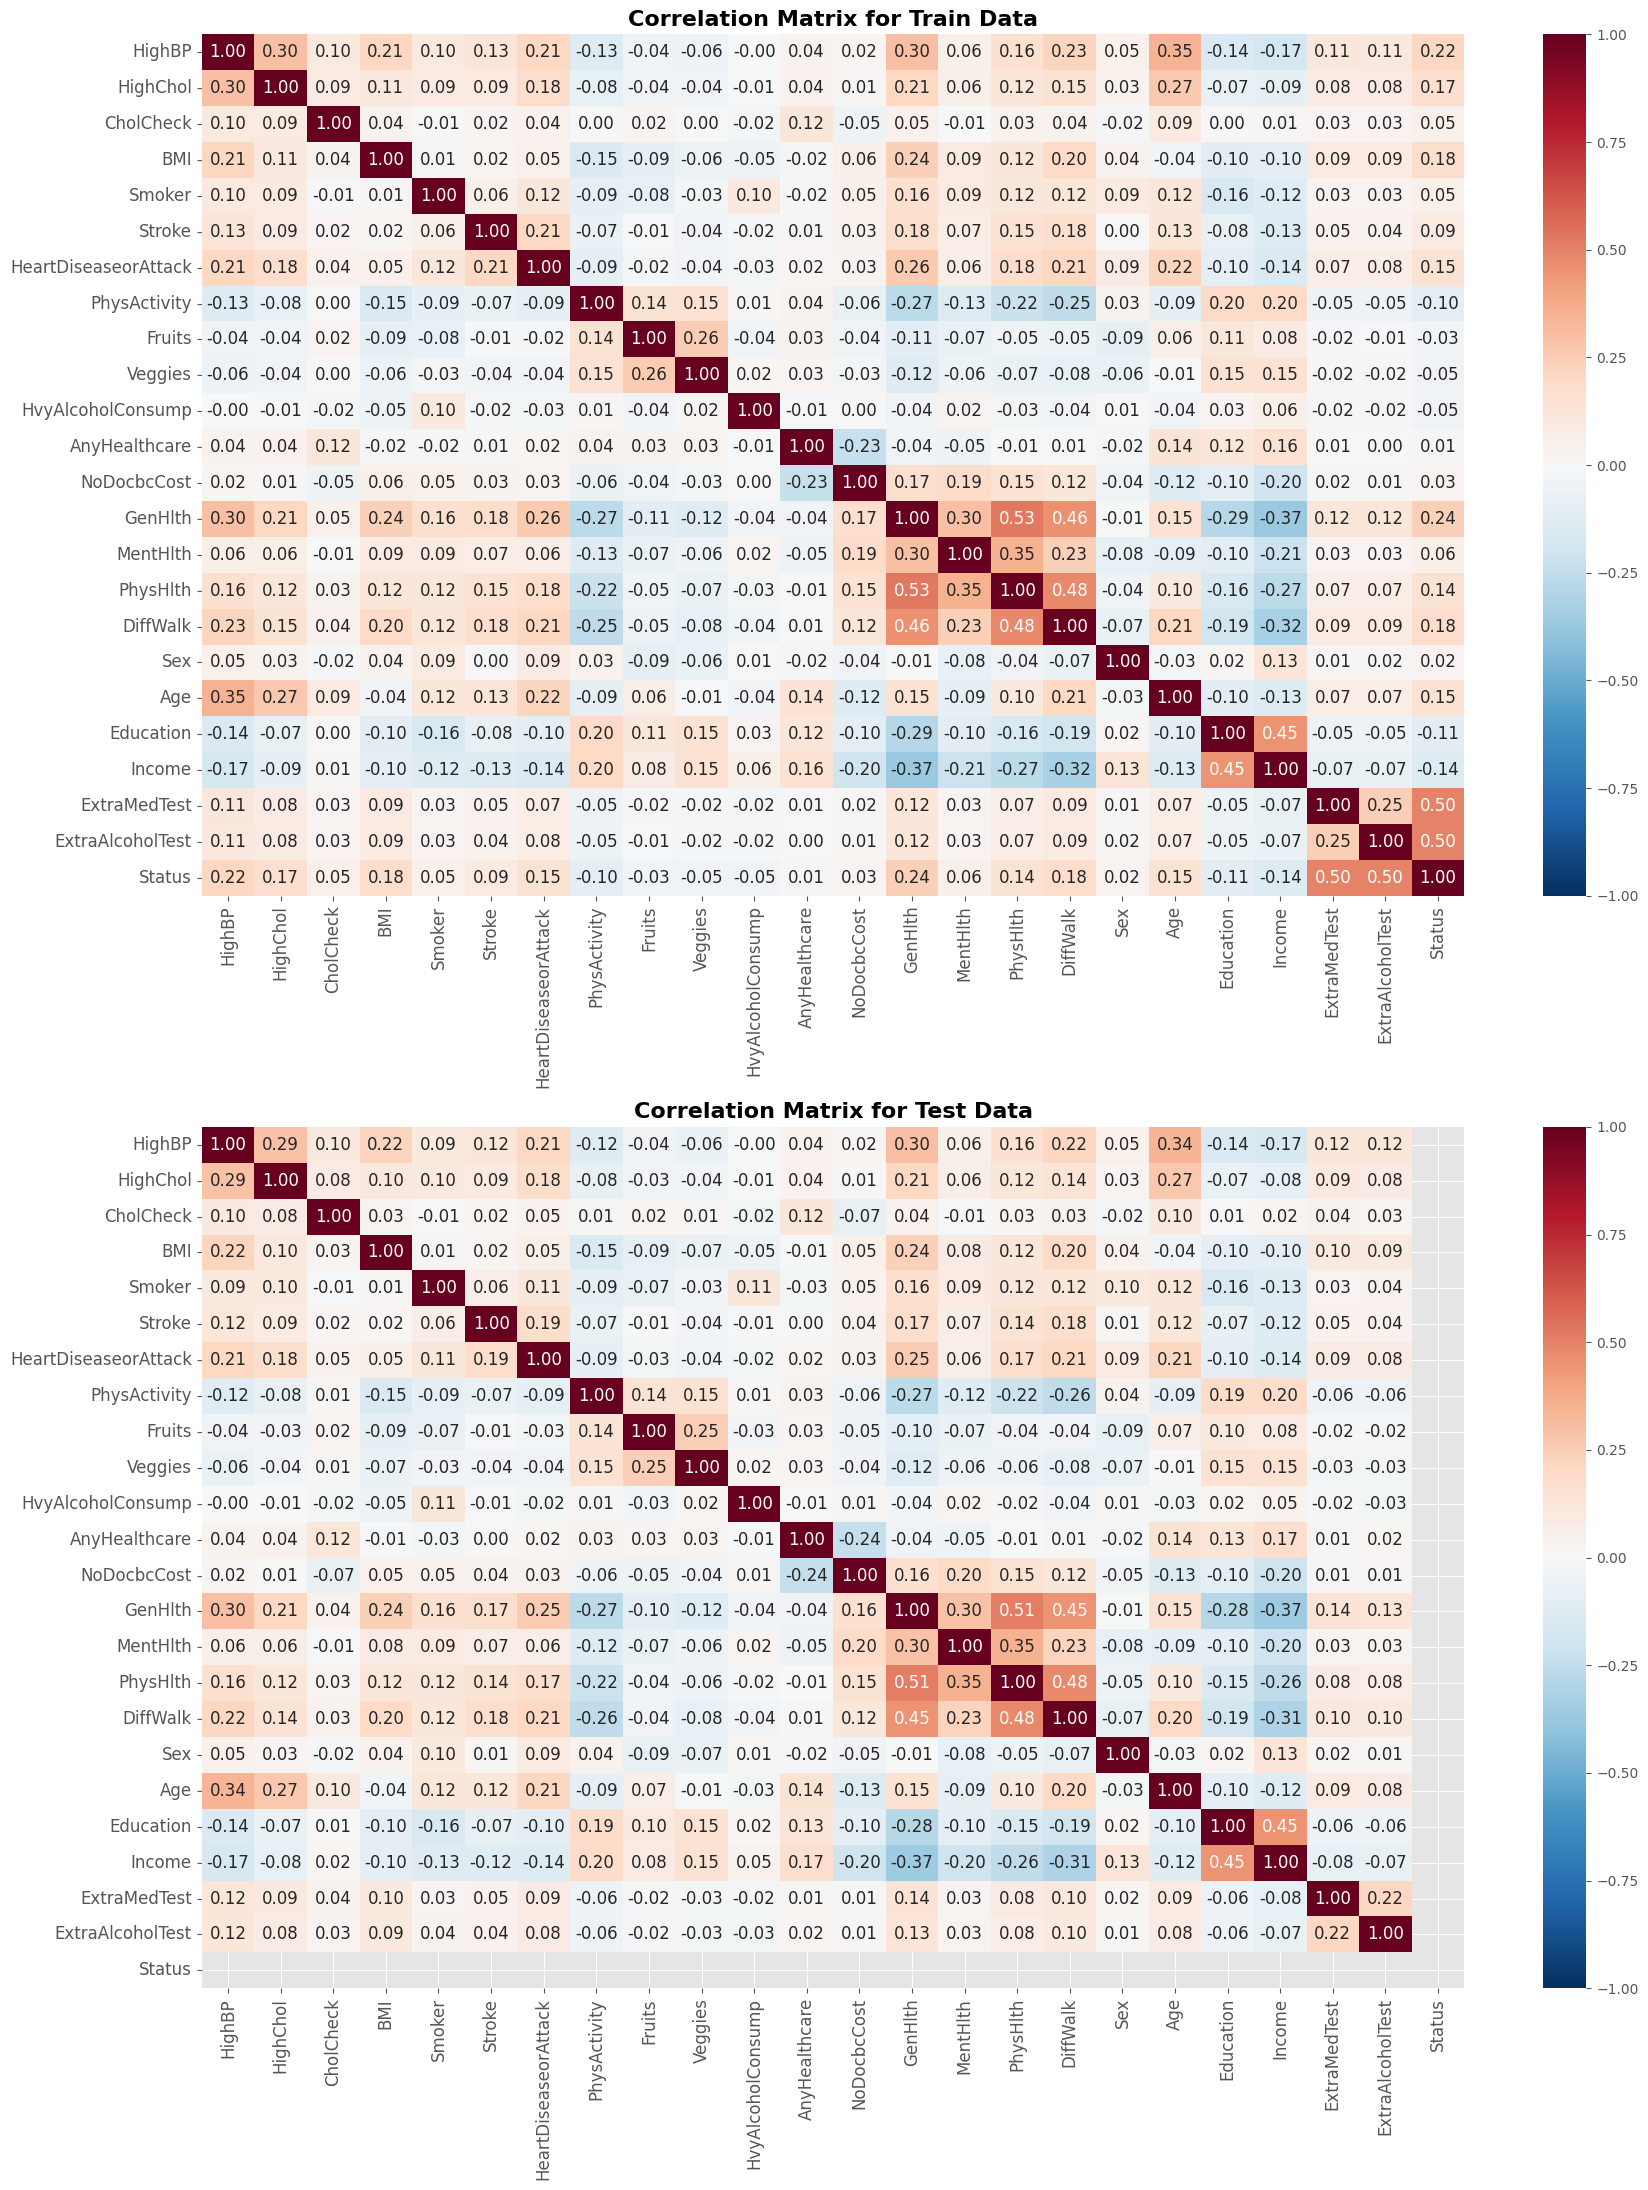

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 22))

# Correlation matrix for train data
axes[0].set_title("Correlation Matrix for Train Data", fontsize=16, fontweight="bold")
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True, fmt=".2f", ax=axes[0], annot_kws={"fontsize":12}, xticklabels=True, yticklabels=True)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Correlation matrix for test data
axes[1].set_title("Correlation Matrix for Test Data", fontsize=16, fontweight="bold")
sns.heatmap(df_test.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True, fmt=".2f", ax=axes[1], annot_kws={"fontsize":12}, xticklabels=True, yticklabels=True)
axes[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

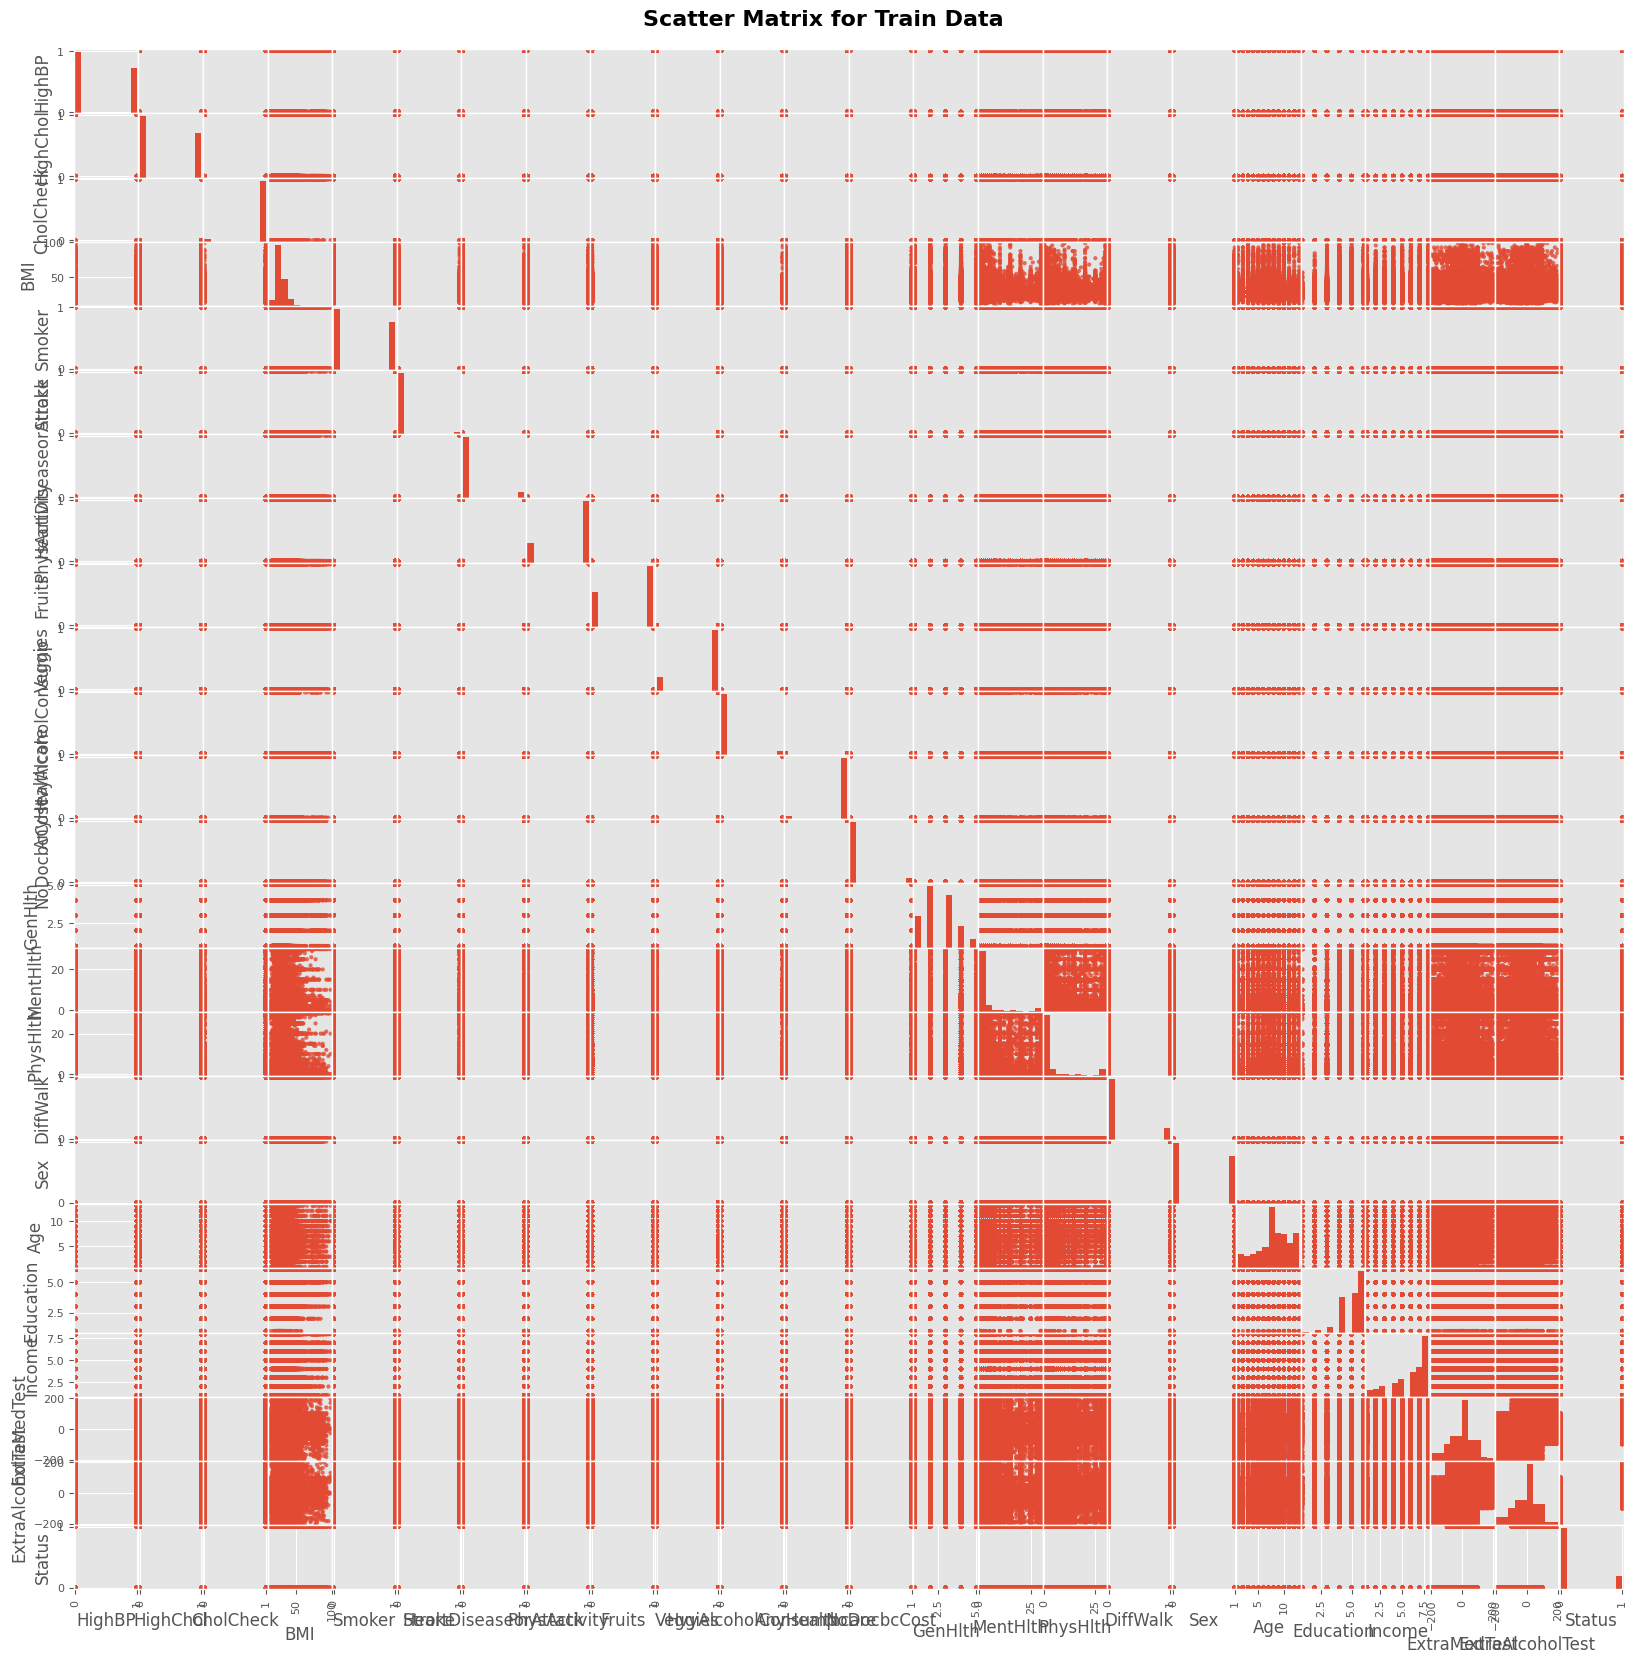

In [13]:
pd.plotting.scatter_matrix(df_train, figsize=(20, 20), alpha=0.8)
plt.suptitle("Scatter Matrix for Train Data", fontsize=16, fontweight="bold", y=0.9)
plt.show()

Base On the above heatmap and scatter matrices, there are some certain observation we can make here:
- HighBP and HighChol are highly correlated. For parsimony, one of the two feature may be retained, potentially the one with a slightly higher correlation to 'Status', which is 'HighBP' and remove 'HighChol'. Research show that High Cholesterol lead to blood pressure and vice versa (ref). And as can be seen from the heatmap, the correlation of Status-HighBP and Status-HighChol are similar.
- The Cholesterol check: Most value are the same with little variance, we might consider remove this feature for our model
- The two feature 'AnyHealthCare' and 'NoDocBcCost' dont vary much between patients will be consider for removal.
- The 'Sex', 'Education' and Status are low correlated -> consider remove the feature. However, researches have shown that sex, or gender, does have impact on the ratio one could have diabete or not, so we will not put this out of our model [] [].
- The scatter matrix show us some evidence of the presence of non-linear patterns and clusters, like in features of 'MenthHlth' and 'PhysHlth', which will effect the non-linear transformations model.
- Although the 'Smoker' and 'PhysActivity' show a weak statistical relationships with the 'Status', we will keep it as there are sources proven their impact on the diabetes risks.

## 3.1 Detailed Correlation between Features

### 3.1.1 Status by HighBP/HighChol

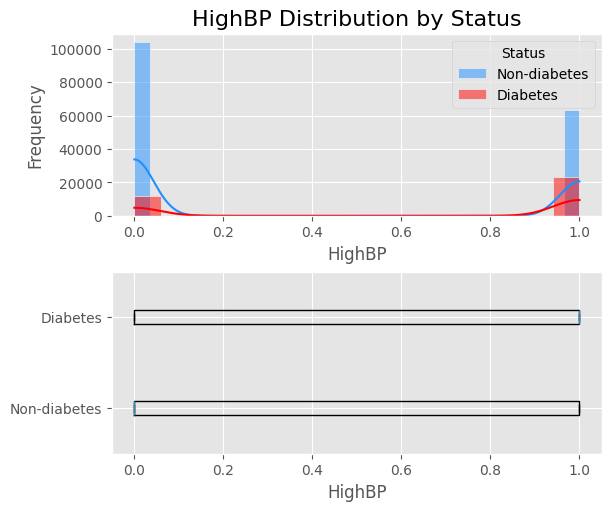

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["HighBP"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["HighBP"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("HighBP Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "HighBP"],
        df_train.loc[df_train["Status"] == 1, "HighBP"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("HighBP")

plt.show()


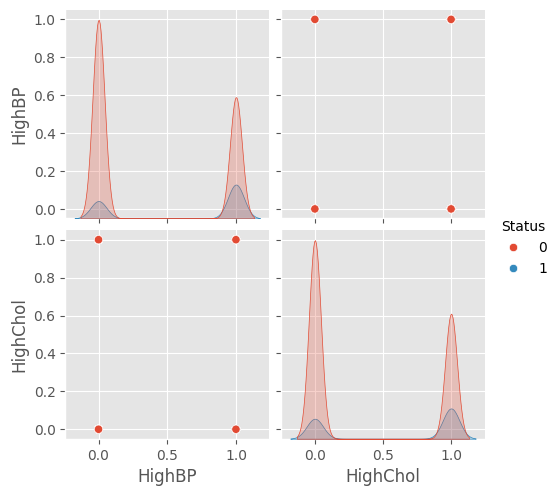

In [82]:
selected_features = ['HighBP', 'HighChol', 'Status']
sns.pairplot(df_train[selected_features], hue='Status')
plt.show()

### 3.1.2 Status by BMI

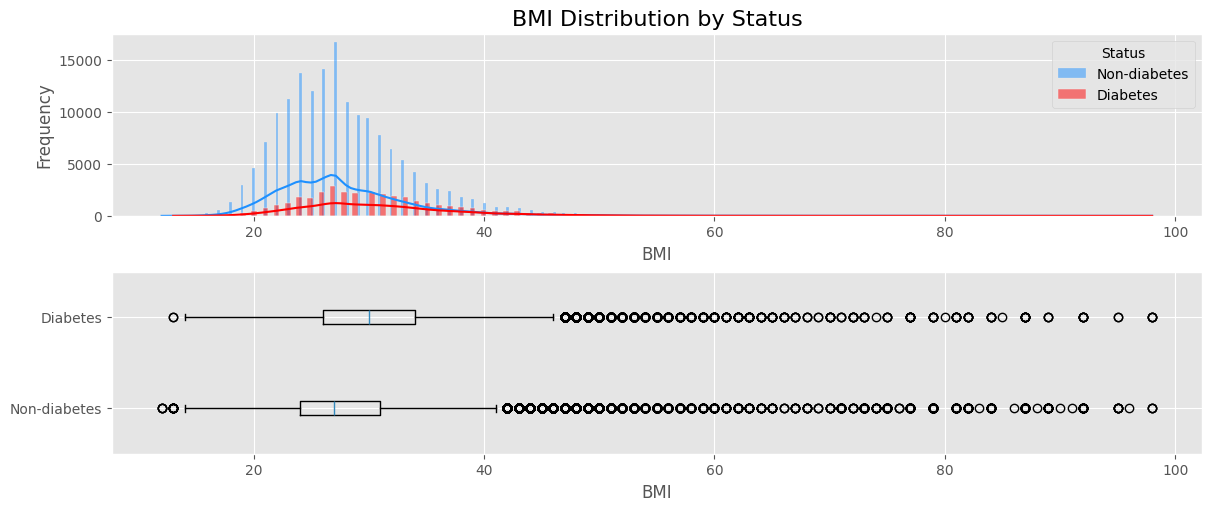

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["BMI"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["BMI"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("BMI Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "BMI"],
        df_train.loc[df_train["Status"] == 1, "BMI"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("BMI")

plt.show()


### 3.1.2 Status by Smoker

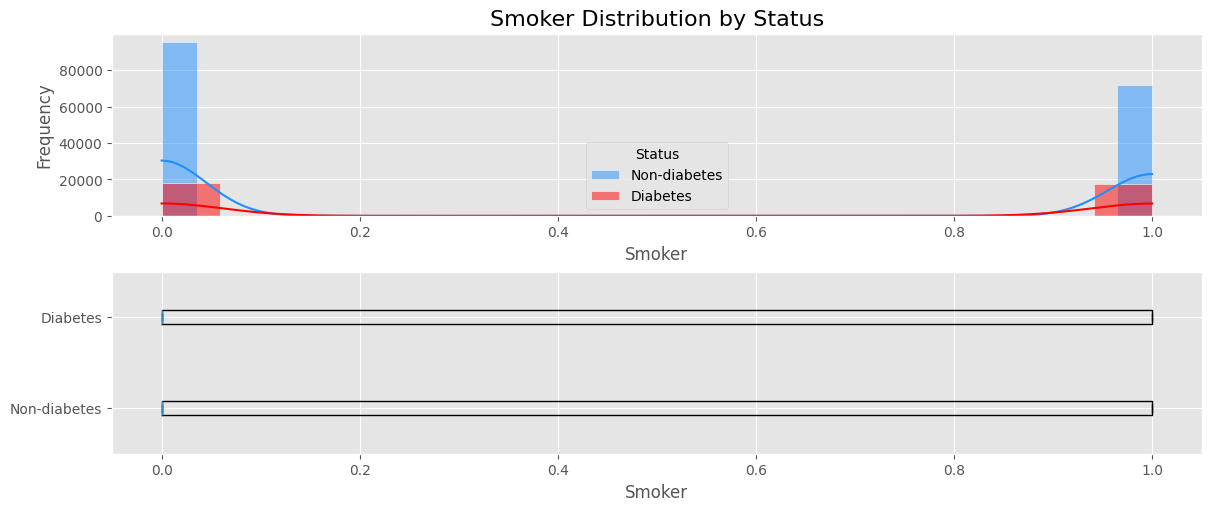

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["Smoker"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["Smoker"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Smoker Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "Smoker"],
        df_train.loc[df_train["Status"] == 1, "Smoker"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("Smoker")

plt.show()


### 3.1.3 Status by Stroke

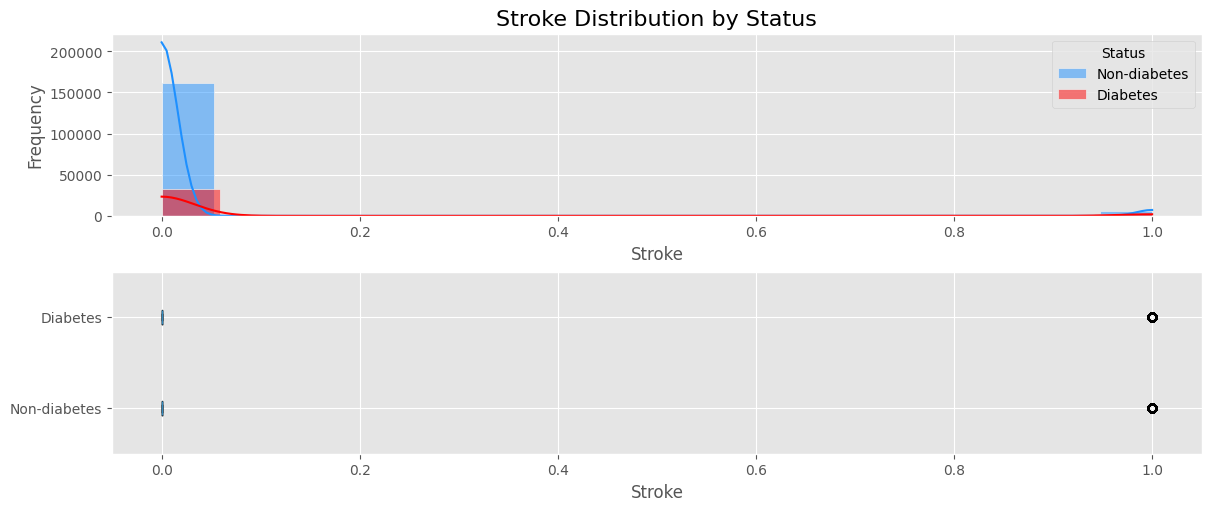

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["Stroke"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["Stroke"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Stroke Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "Stroke"],
        df_train.loc[df_train["Status"] == 1, "Stroke"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("Stroke")

plt.show()


### 3.1.4 Status by HeartDiseaseorAttack

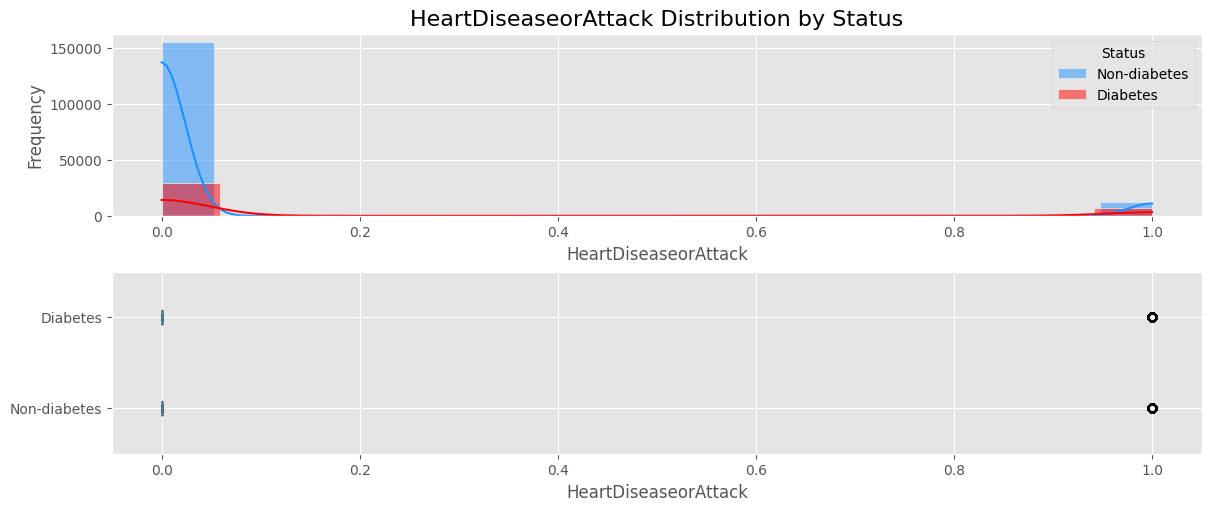

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["HeartDiseaseorAttack"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["HeartDiseaseorAttack"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("HeartDiseaseorAttack Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "HeartDiseaseorAttack"],
        df_train.loc[df_train["Status"] == 1, "HeartDiseaseorAttack"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("HeartDiseaseorAttack")

plt.show()


### 3.1.5 Status by PhysActivity

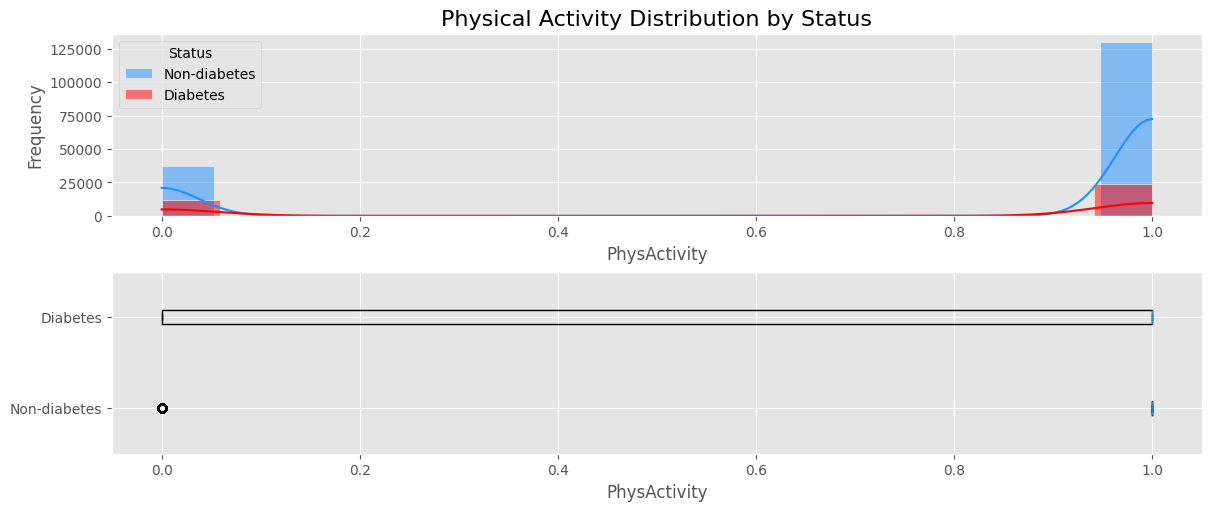

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["PhysActivity"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["PhysActivity"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Physical Activity Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "PhysActivity"],
        df_train.loc[df_train["Status"] == 1, "PhysActivity"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("PhysActivity")

plt.show()


### 3.1.6 Status by Fruits

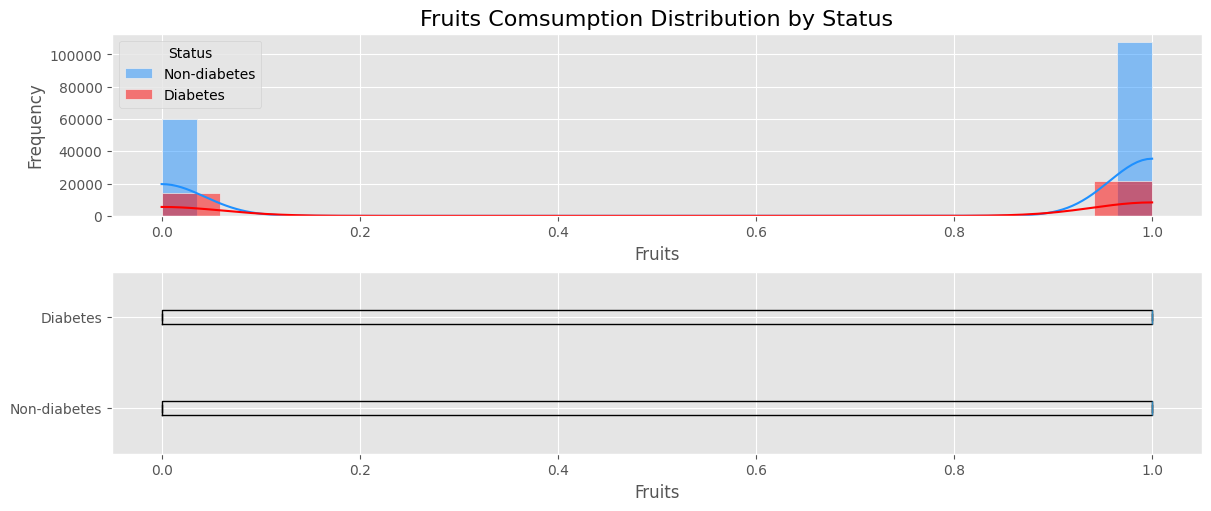

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["Fruits"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["Fruits"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Fruits Comsumption Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "Fruits"],
        df_train.loc[df_train["Status"] == 1, "Fruits"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("Fruits")

plt.show()


### 3.1.7 Status by Smoker

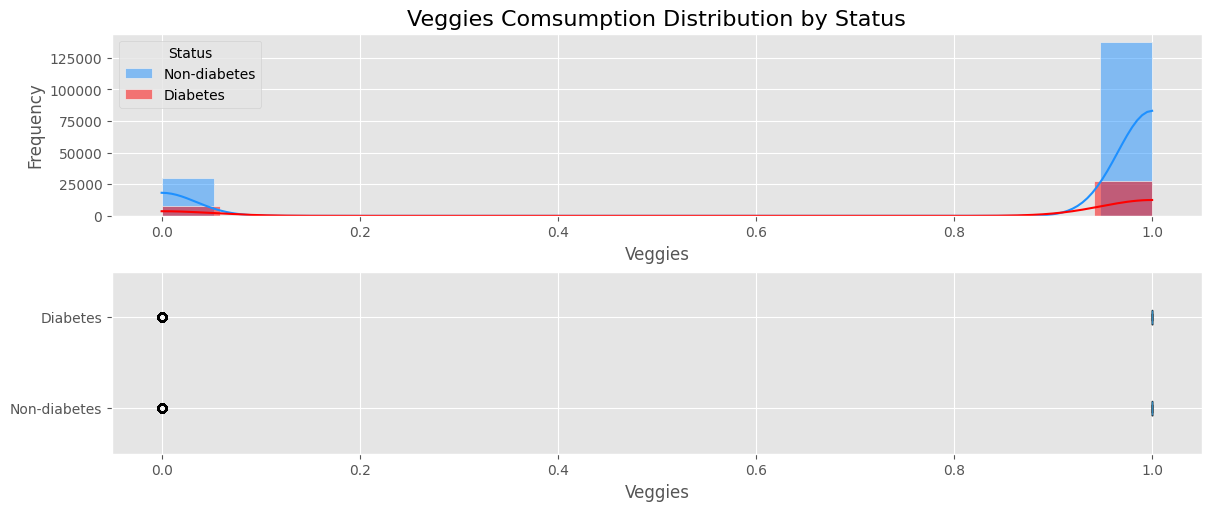

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["Veggies"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["Veggies"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Veggies Comsumption Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "Veggies"],
        df_train.loc[df_train["Status"] == 1, "Veggies"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("Veggies")

plt.show()


### 3.1.8 Status by HvyAlcoholConsump

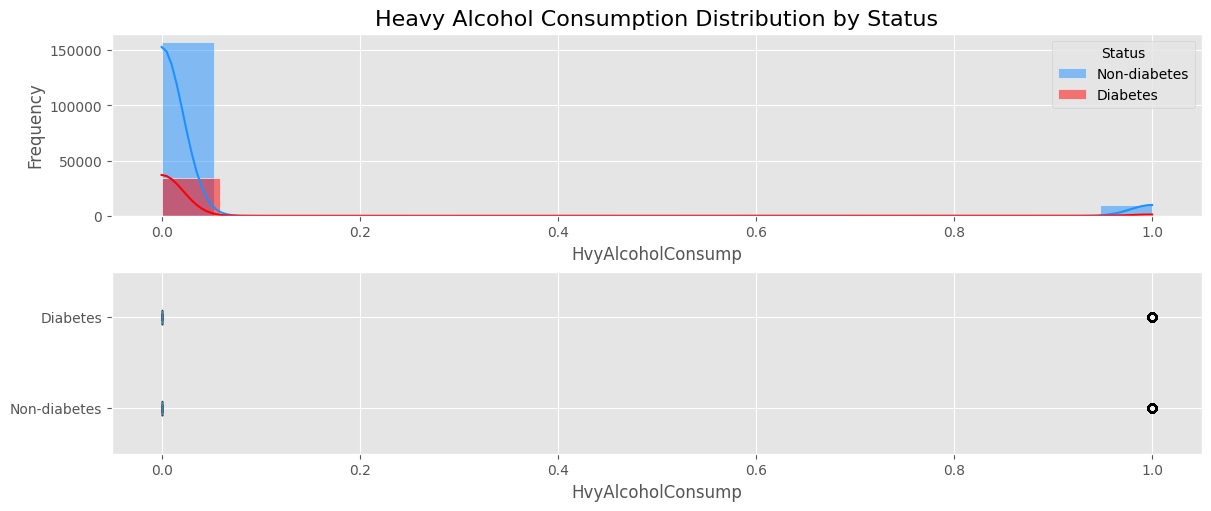

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["HvyAlcoholConsump"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["HvyAlcoholConsump"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Heavy Alcohol Consumption Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "HvyAlcoholConsump"],
        df_train.loc[df_train["Status"] == 1, "HvyAlcoholConsump"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("HvyAlcoholConsump")

plt.show()


### 3.1.9 Status by GenHlth

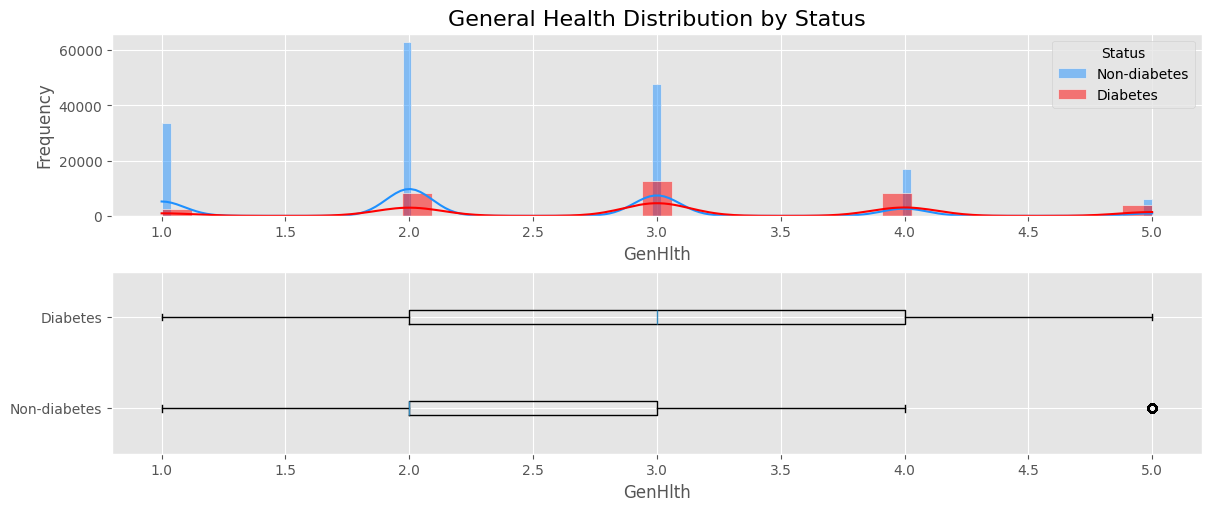

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["GenHlth"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["GenHlth"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("General Health Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "GenHlth"],
        df_train.loc[df_train["Status"] == 1, "GenHlth"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("GenHlth")

plt.show()


### 3.1.10 Status by MentHlth

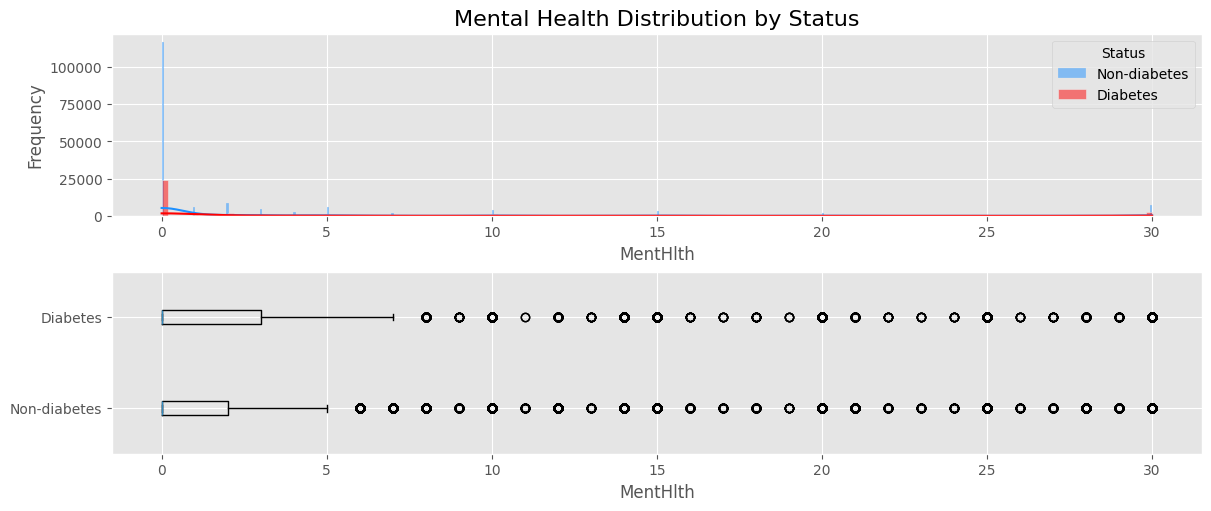

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["MentHlth"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["MentHlth"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Mental Health Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "MentHlth"],
        df_train.loc[df_train["Status"] == 1, "MentHlth"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("MentHlth")

plt.show()


### 3.1.11 Status by PhysHlth

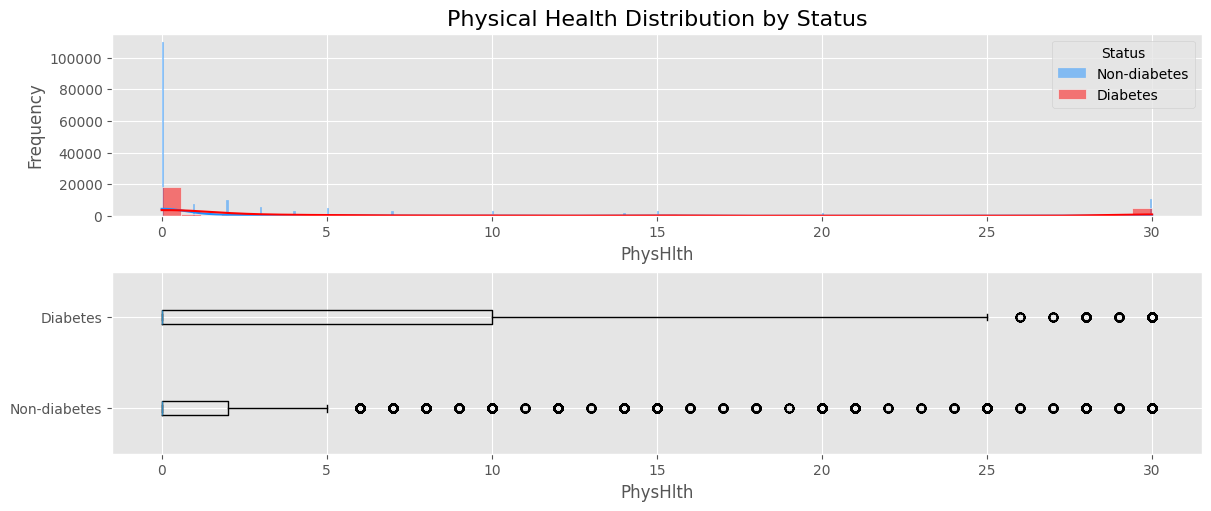

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["PhysHlth"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["PhysHlth"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Physical Health Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "PhysHlth"],
        df_train.loc[df_train["Status"] == 1, "PhysHlth"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("PhysHlth")

plt.show()


### 3.1.12 Status by DiffWalk

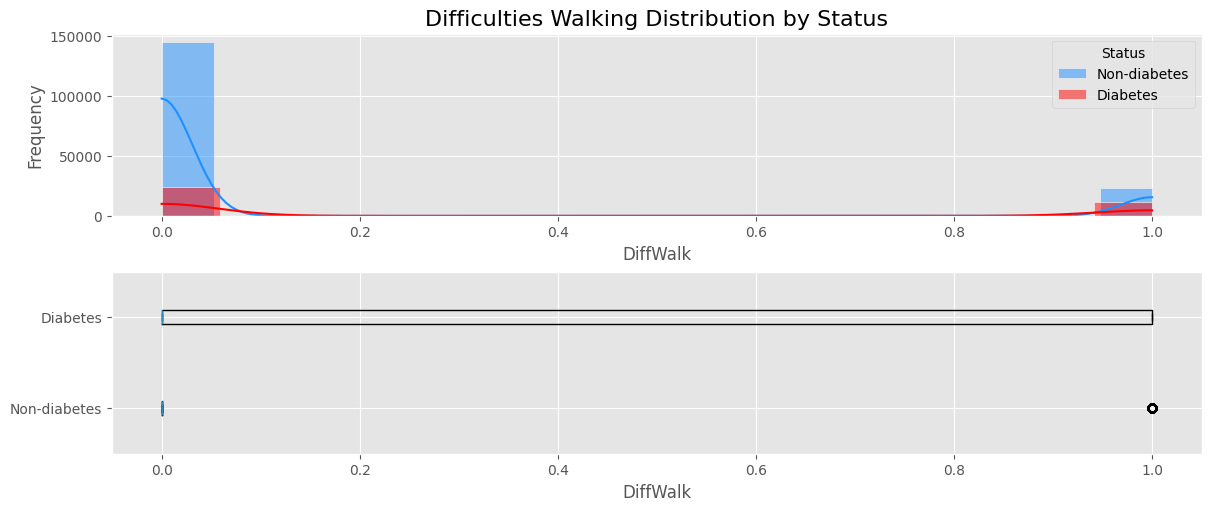

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["DiffWalk"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["DiffWalk"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Difficulties Walking Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "DiffWalk"],
        df_train.loc[df_train["Status"] == 1, "DiffWalk"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("DiffWalk")

plt.show()


### 3.1.13 Status by Age

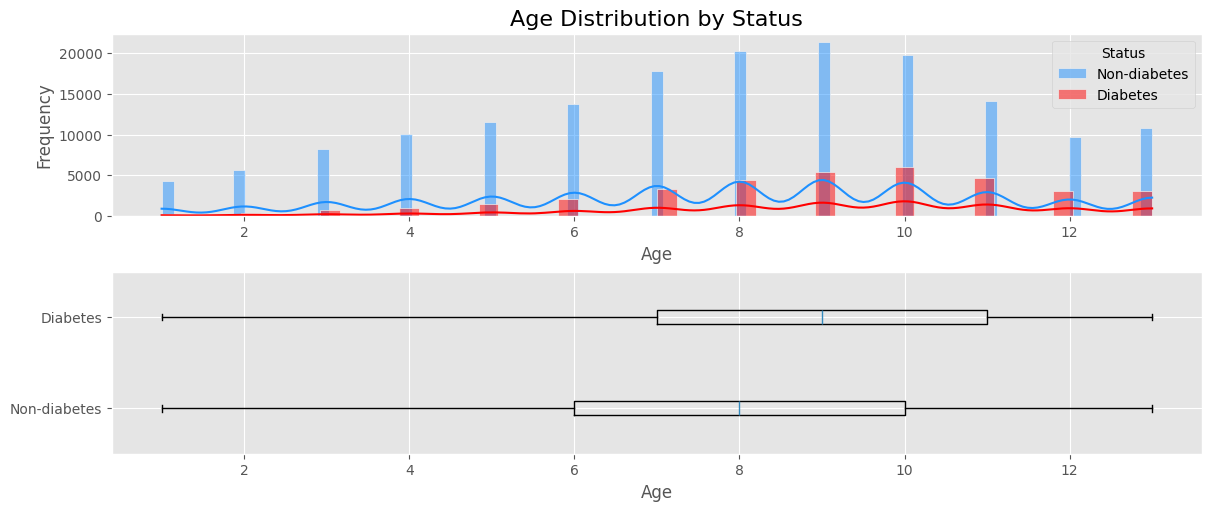

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["Age"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["Age"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Age Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "Age"],
        df_train.loc[df_train["Status"] == 1, "Age"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("Age")

plt.show()


### 3.1.14 Status by Income

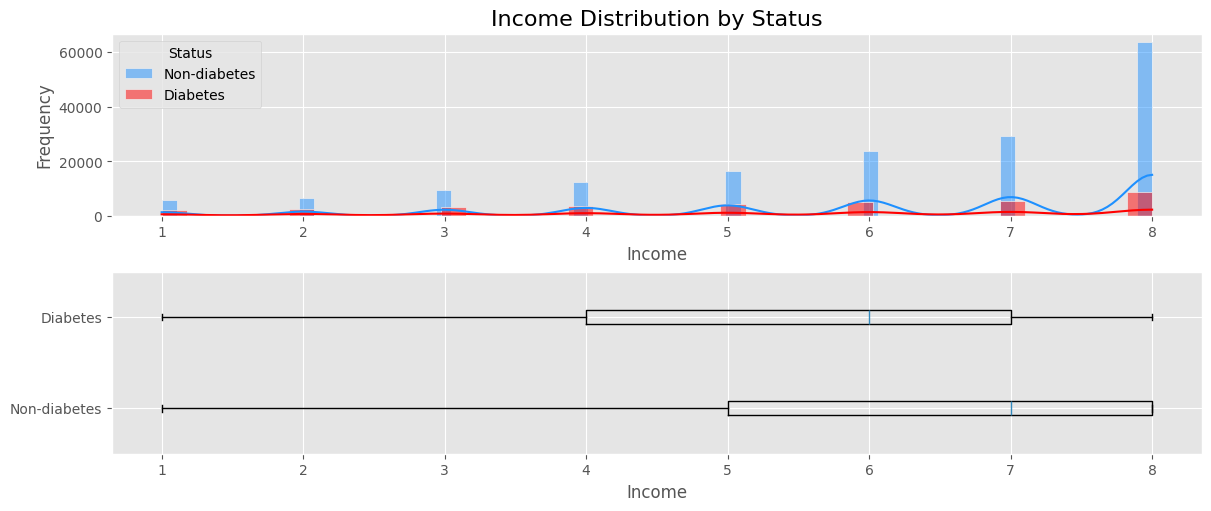

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["Income"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["Income"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Income Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "Income"],
        df_train.loc[df_train["Status"] == 1, "Income"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("Income")

plt.show()


### 3.1.15 Status by ExtraMedTest

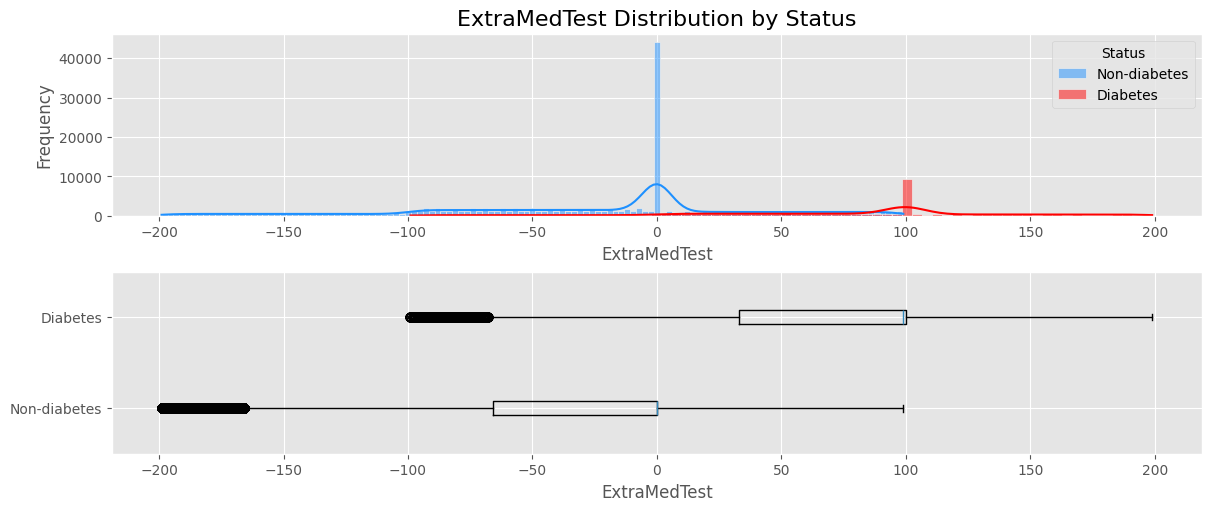

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["ExtraMedTest"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["ExtraMedTest"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("ExtraMedTest Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "ExtraMedTest"],
        df_train.loc[df_train["Status"] == 1, "ExtraMedTest"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("ExtraMedTest")

plt.show()


### 3.1.16 Status by ExtraAlcoholTest

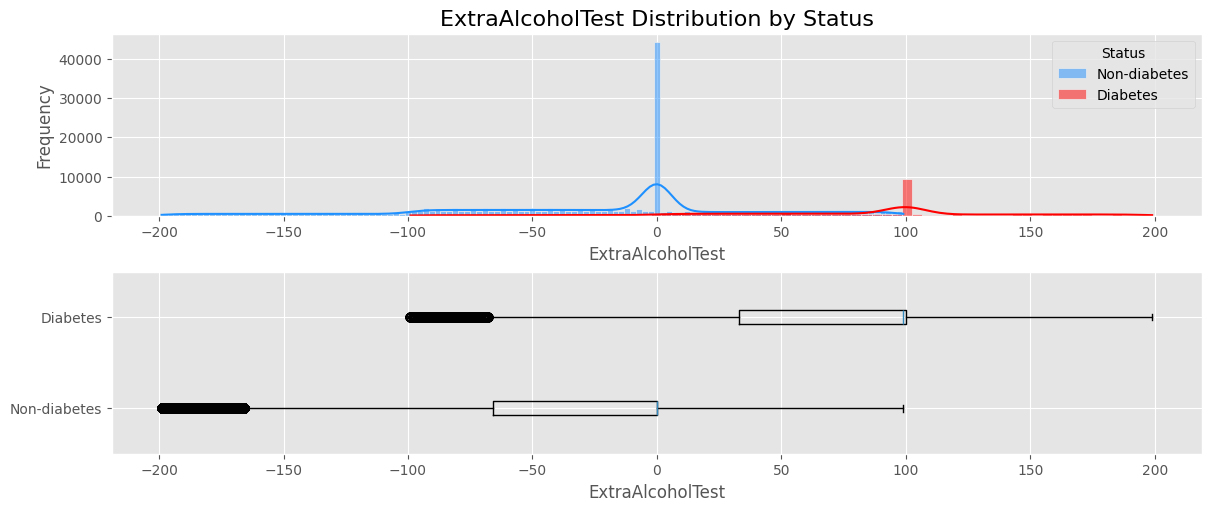

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["ExtraAlcoholTest"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["ExtraAlcoholTest"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("ExtraAlcoholTest Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "ExtraAlcoholTest"],
        df_train.loc[df_train["Status"] == 1, "ExtraAlcoholTest"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("ExtraAlcoholTest")

plt.show()


### 3.1.17 Status by Sex

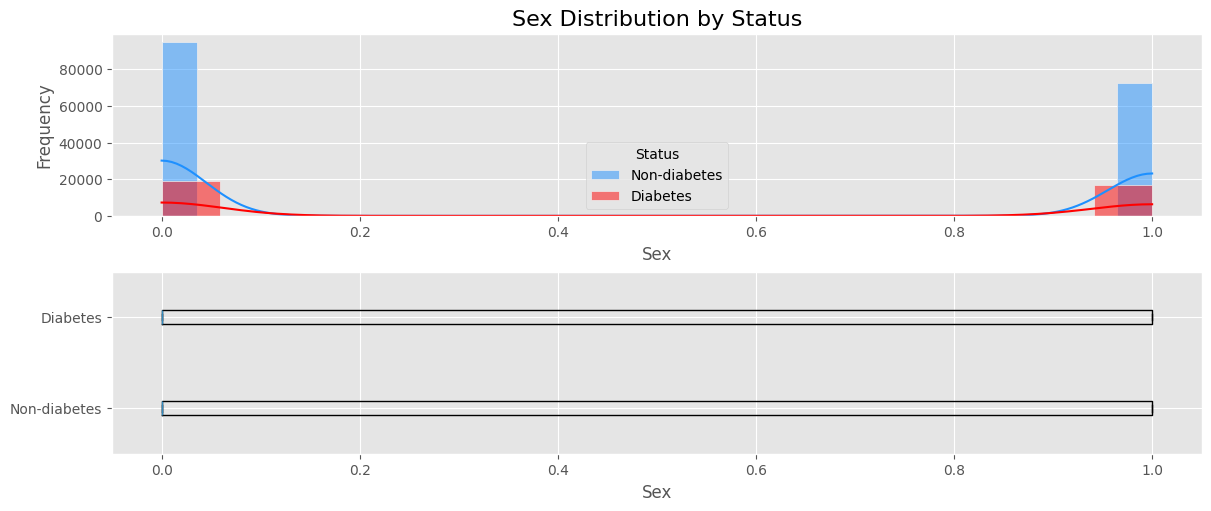

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True)

sns.histplot(df_train[df_train["Status"] == 0]["Sex"], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
sns.histplot(df_train[df_train["Status"] == 1]["Sex"], kde=True, color="red", label="Diabetes", ax=axes[0])
axes[0].legend(title="Status")
axes[0].set_ylabel("Frequency")

axes[0].set_title("Sex Distribution by Status", fontsize=16)

axes[1].boxplot(
    [
        df_train.loc[df_train["Status"] == 0, "Sex"],
        df_train.loc[df_train["Status"] == 1, "Sex"]
    ],
    vert=False, labels=["Non-diabetes", "Diabetes"]
)
axes[1].set_xlabel("Sex")

plt.show()


### 3.2 Conclusion


In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)